# ARIMA(Autoregressvie integrated MovingAverage)

AR(자기상관) : 이전의 값이 이후의 값에 영향을 미치고 있는 상황

MA(이동평균) : 랜덤 변수의 평균값이 지속적으로 증가하거나 감소하는 추세

In [43]:
import pandas as pd
import numpy as np

In [44]:
%matplotlib inline
from datetime import datetime
import matplotlib as mpl
import matplotlib.pylab
import matplotlib.font_manager as fm
from matplotlib import pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 14
# rcParams['figure.figsize'] = 20, 16

In [45]:
matplotlib.rc('font',family='NanumGothic')

In [46]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [47]:
# ! python -m pip install statsmodels
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [48]:
df = pd.read_excel('./raw_data1 - 복사본.xls', header=None)
df.head(5)

0         1              2              3              4              5    \
0  id     place  200701.000000  200702.000000  200703.000000  200704.000000   
1   3        본사      57.382043      57.382043      57.382043      57.382043   
2   4      수원지사   72529.673668   51313.988844   55578.781220   38927.052375   
3   5      대구지사   35332.983796   26056.576383   22592.707640   10383.292631   
4   6  중앙지사(중앙)     571.012976     401.936594     396.549537     308.846904   

             6              7              8              9    ...  \
0  200705.000000  200706.000000  200707.000000  200708.000000  ...   
1      57.382043      57.382043      57.382043      57.382043  ...   
2   24243.438721    2531.559101    4821.135312    2878.479271  ...   
3     742.903862     426.583955     458.198029    1128.308661  ...   
4     113.084214      55.182441      61.954262      75.261049  ...   

             167            168       169            170            171  \
0  202010.000000  202011.000000  202012.0  202101.000000  202102.000000   
1            NaN            NaN       NaN            NaN            NaN   
2     436.495737     482.668351       NaN   23781.204491   12089.474471   
3    7178.463505   18913.623240       NaN   55408.755254   38630.213251   
4     245.213931     407.592663       NaN     673.019092     503.396730   

             172            173            174            175            176  
0  202103.000000  202104.000000  202105.000000  202106.000000  202107.000000  
1            NaN            NaN            NaN            NaN            NaN  
2     916.704183     382.703383    4759.556990     402.562764    3831.139208  
3   28403.707774   11736.190245    2462.713272     991.446671    3124.839220  
4     453.074325     325.239655     318.714947     267.337883     273.604754  

[5 rows x 177 columns]

In [49]:
# df = df.set_index('id', drop=False)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Columns: 177 entries, 0 to 176
dtypes: float64(175), object(2)
memory usage: 29.2+ KB


In [51]:
# 기간범위 : 200701 - 202107
df_date = pd.date_range('20070101', '20210802', freq='M')
calender = df_date.strftime("%Y%m").tolist()
calender

['200701',
 '200702',
 '200703',
 '200704',
 '200705',
 '200706',
 '200707',
 '200708',
 '200709',
 '200710',
 '200711',
 '200712',
 '200801',
 '200802',
 '200803',
 '200804',
 '200805',
 '200806',
 '200807',
 '200808',
 '200809',
 '200810',
 '200811',
 '200812',
 '200901',
 '200902',
 '200903',
 '200904',
 '200905',
 '200906',
 '200907',
 '200908',
 '200909',
 '200910',
 '200911',
 '200912',
 '201001',
 '201002',
 '201003',
 '201004',
 '201005',
 '201006',
 '201007',
 '201008',
 '201009',
 '201010',
 '201011',
 '201012',
 '201101',
 '201102',
 '201103',
 '201104',
 '201105',
 '201106',
 '201107',
 '201108',
 '201109',
 '201110',
 '201111',
 '201112',
 '201201',
 '201202',
 '201203',
 '201204',
 '201205',
 '201206',
 '201207',
 '201208',
 '201209',
 '201210',
 '201211',
 '201212',
 '201301',
 '201302',
 '201303',
 '201304',
 '201305',
 '201306',
 '201307',
 '201308',
 '201309',
 '201310',
 '201311',
 '201312',
 '201401',
 '201402',
 '201403',
 '201404',
 '201405',
 '201406',
 '201407',

In [52]:
# 4 : 수원지사(sw)  # 20 동탄지사
# sw = df.loc[2].tolist()
# sw = sw[2:]
# sw

In [53]:
# df.loc[20].tolist()

In [54]:
# x_values = calender
# y_values = sw
# plt.plot(x_values, y_values)
# plt.show()

In [55]:
# for i in range(1, 21):
#     data = []
#     data = df.loc[i].tolist()
#     print(data[0:2])
#     data = data[2:]
    
#     x_values = calender
#     y_values = data
#     plt.plot(x_values, y_values)
#     plt.show()
#     print('---------------------------------')

## 201706 ~ 201812 까지의 자료 누락 -> 꺽은선 그려본 결과 중간에 없어도 될 것 같음
## 제거 : 3본사, 10양산지사,24동탄지사

In [56]:
dff = pd.read_excel('./raw_data1.xls')
dff = dff.transpose()
dff.head(5) # 1수원 ~ 13고양

0        1        2         3        4        5        6   \
id           3        4        5         6        7        8        9   
place       본사     수원지사     대구지사  중앙지사(중앙)     파주지사     청주지사     용인지사   
200701  57.382  72529.7    35333   571.013   4661.6  40552.1    54150   
200702  57.382    51314  26056.6   401.937  3743.26  31208.1  41422.5   
200703  57.382  55578.8  22592.7    396.55  3636.62  30376.9  36450.3   

             7        8        9        10        11       12       13    14  \
id           10       11       12       13        14       15       16    19   
place      양산지사     김해지사     화성지사     강남지사  중앙지사(상암)     분당지사     고양지사  삼송지사   
200701  3539.48  7407.09    17862  73748.4   632.854  4569.34  3621.53   NaN   
200702  2843.06  5456.73  16150.8  48082.1   687.108  4917.67  2694.17   NaN   
200703  2696.69  5996.73    16465    40928   870.946  4667.16  3282.06   NaN   

          15    16      17    18    19  
id        20    21      22    23    24  
place   판교지사  광교지사  광주전남지사  세종지사  동탄지사  
200701   NaN   NaN     NaN   NaN   NaN  
200702   NaN   NaN     NaN   NaN   NaN  
200703   NaN   NaN     NaN   NaN   NaN

In [57]:
dff = dff[1:]
dff = dff.rename(columns=dff.iloc[0])
dff.head(5)

본사     수원지사     대구지사  중앙지사(중앙)     파주지사     청주지사     용인지사  \
place       본사     수원지사     대구지사  중앙지사(중앙)     파주지사     청주지사     용인지사   
200701  57.382  72529.7    35333   571.013   4661.6  40552.1    54150   
200702  57.382    51314  26056.6   401.937  3743.26  31208.1  41422.5   
200703  57.382  55578.8  22592.7    396.55  3636.62  30376.9  36450.3   
200704  57.382  38927.1  10383.3   308.847  2380.21  19290.9  16972.7   

           양산지사     김해지사     화성지사     강남지사  중앙지사(상암)     분당지사     고양지사  삼송지사  \
place      양산지사     김해지사     화성지사     강남지사  중앙지사(상암)     분당지사     고양지사  삼송지사   
200701  3539.48  7407.09    17862  73748.4   632.854  4569.34  3621.53   NaN   
200702  2843.06  5456.73  16150.8  48082.1   687.108  4917.67  2694.17   NaN   
200703  2696.69  5996.73    16465    40928   870.946  4667.16  3282.06   NaN   
200704  1945.26  2410.25  11342.1  13520.8   962.725  2920.41  1744.44   NaN   

        판교지사  광교지사  광주전남지사  세종지사  동탄지사  
place   판교지사  광교지사  광주전남지사  세종지사  동탄지사  
200701   NaN   NaN     NaN   NaN   NaN  
200702   NaN   NaN     NaN   NaN   NaN  
200703   NaN   NaN     NaN   NaN   NaN  
200704   NaN   NaN     NaN   NaN   NaN

In [58]:
dff = dff.drop(dff.index[0])
dff.head(5)  # 1수원 ~ 13고양

본사     수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     양산지사  \
200701  57.382  72529.7    35333  571.013   4661.6  40552.1    54150  3539.48   
200702  57.382    51314  26056.6  401.937  3743.26  31208.1  41422.5  2843.06   
200703  57.382  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  2696.69   
200704  57.382  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  1945.26   
200705  57.382  24243.4  742.904  113.084  1281.08  8832.66  1703.62   1155.6   

           김해지사     화성지사     강남지사 중앙지사(상암)     분당지사     고양지사 삼송지사 판교지사 광교지사  \
200701  7407.09    17862  73748.4  632.854  4569.34  3621.53  NaN  NaN  NaN   
200702  5456.73  16150.8  48082.1  687.108  4917.67  2694.17  NaN  NaN  NaN   
200703  5996.73    16465    40928  870.946  4667.16  3282.06  NaN  NaN  NaN   
200704  2410.25  11342.1  13520.8  962.725  2920.41  1744.44  NaN  NaN  NaN   
200705  122.787  10099.5  634.321  1052.37  1471.21  2764.01  NaN  NaN  NaN   

       광주전남지사 세종지사 동탄지사  
200701    NaN  NaN  NaN  
200702    NaN  NaN  NaN  
200703    NaN  NaN  NaN  
200704    NaN  NaN  NaN  
200705    NaN  NaN  NaN

In [59]:
# dff[['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사', '삼송지사', '판교지사', '광교지사', '광주전남지사', '세종지사']].plot()

In [60]:
# 기간범위 : 200701 - 202107
df_date = pd.date_range('20070101', '20210802', freq='M')
df_date
len(df_date)

175

In [61]:
dff['date'] = df_date
dff

본사     수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     양산지사  \
200701  57.382  72529.7    35333  571.013   4661.6  40552.1    54150  3539.48   
200702  57.382    51314  26056.6  401.937  3743.26  31208.1  41422.5  2843.06   
200703  57.382  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  2696.69   
200704  57.382  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  1945.26   
200705  57.382  24243.4  742.904  113.084  1281.08  8832.66  1703.62   1155.6   
...        ...      ...      ...      ...      ...      ...      ...      ...   
202103     NaN  916.704  28403.7  453.074   103592  25836.6  1663.69  8129.82   
202104     NaN  382.703  11736.2   325.24   112719  12198.7  491.652  3767.37   
202105     NaN  4759.56  2462.71  318.715  36053.3  7386.17  351.284  2127.21   
202106     NaN  402.563  991.447  267.338  40762.7  3697.56  343.233  2095.22   
202107     NaN  3831.14  3124.84  273.605  49500.6  4189.74  426.339  934.791   

           김해지사     화성지사  ... 중앙지사(상암)     분당지사     고양지사     삼송지사     판교지사  \
200701  7407.09    17862  ...  632.854  4569.34  3621.53      NaN      NaN   
200702  5456.73  16150.8  ...  687.108  4917.67  2694.17      NaN      NaN   
200703  5996.73    16465  ...  870.946  4667.16  3282.06      NaN      NaN   
200704  2410.25  11342.1  ...  962.725  2920.41  1744.44      NaN      NaN   
200705  122.787  10099.5  ...  1052.37  1471.21  2764.01      NaN      NaN   
...         ...      ...  ...      ...      ...      ...      ...      ...   
202103  3950.97   153081  ...  2252.67  1088.74  749.181  483.302  51331.6   
202104  1792.75  4440.29  ...  2656.48  400.491  650.519  770.809  46195.7   
202105  1615.09   725.86  ...  3238.28  279.447  906.033   849.75    45763   
202106  102.964    11116  ...  4594.83  476.812  1190.05  1210.38  4687.73   
202107  72.6187  56292.1  ...  3639.53  384.836  2339.56  1006.34  23876.9   

           광교지사   광주전남지사     세종지사     동탄지사       date  
200701      NaN      NaN      NaN      NaN 2007-01-31  
200702      NaN      NaN      NaN      NaN 2007-02-28  
200703      NaN      NaN      NaN      NaN 2007-03-31  
200704      NaN      NaN      NaN      NaN 2007-04-30  
200705      NaN      NaN      NaN      NaN 2007-05-31  
...         ...      ...      ...      ...        ...  
202103  24571.3  3683.46  1321.08   186791 2021-03-31  
202104  43755.8  3014.28  1877.08   193534 2021-04-30  
202105  44294.2  4814.92  142.318  89962.2 2021-05-31  
202106  16908.5  7721.98  480.658   157331 2021-06-30  
202107  28426.8  10270.1  1059.18   150436 2021-07-31  

[175 rows x 21 columns]

In [62]:
dff = dff.set_index('date')

In [63]:
dff.head(5)

본사     수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사  \
date                                                                       
2007-01-31  57.382  72529.7    35333  571.013   4661.6  40552.1    54150   
2007-02-28  57.382    51314  26056.6  401.937  3743.26  31208.1  41422.5   
2007-03-31  57.382  55578.8  22592.7   396.55  3636.62  30376.9  36450.3   
2007-04-30  57.382  38927.1  10383.3  308.847  2380.21  19290.9  16972.7   
2007-05-31  57.382  24243.4  742.904  113.084  1281.08  8832.66  1703.62   

               양산지사     김해지사     화성지사     강남지사 중앙지사(상암)     분당지사     고양지사  \
date                                                                        
2007-01-31  3539.48  7407.09    17862  73748.4  632.854  4569.34  3621.53   
2007-02-28  2843.06  5456.73  16150.8  48082.1  687.108  4917.67  2694.17   
2007-03-31  2696.69  5996.73    16465    40928  870.946  4667.16  3282.06   
2007-04-30  1945.26  2410.25  11342.1  13520.8  962.725  2920.41  1744.44   
2007-05-31   1155.6  122.787  10099.5  634.321  1052.37  1471.21  2764.01   

           삼송지사 판교지사 광교지사 광주전남지사 세종지사 동탄지사  
date                                        
2007-01-31  NaN  NaN  NaN    NaN  NaN  NaN  
2007-02-28  NaN  NaN  NaN    NaN  NaN  NaN  
2007-03-31  NaN  NaN  NaN    NaN  NaN  NaN  
2007-04-30  NaN  NaN  NaN    NaN  NaN  NaN  
2007-05-31  NaN  NaN  NaN    NaN  NaN  NaN

In [64]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2007-01-31 to 2021-07-31
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   본사        141 non-null    object
 1   수원지사      169 non-null    object
 2   대구지사      169 non-null    object
 3   중앙지사(중앙)  169 non-null    object
 4   파주지사      169 non-null    object
 5   청주지사      169 non-null    object
 6   용인지사      169 non-null    object
 7   양산지사      169 non-null    object
 8   김해지사      169 non-null    object
 9   화성지사      169 non-null    object
 10  강남지사      169 non-null    object
 11  중앙지사(상암)  169 non-null    object
 12  분당지사      169 non-null    object
 13  고양지사      169 non-null    object
 14  삼송지사      133 non-null    object
 15  판교지사      148 non-null    object
 16  광교지사      109 non-null    object
 17  광주전남지사    97 non-null     object
 18  세종지사      109 non-null    object
 19  동탄지사      29 non-null     object
dtypes: object(20)
memory usage: 28.7+ K

In [65]:
dff = dff[pd.Series(pd.to_datetime(dff.index, errors='coerce')).notnull().values]
dff.head(5)

본사     수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사  \
date                                                                       
2007-01-31  57.382  72529.7    35333  571.013   4661.6  40552.1    54150   
2007-02-28  57.382    51314  26056.6  401.937  3743.26  31208.1  41422.5   
2007-03-31  57.382  55578.8  22592.7   396.55  3636.62  30376.9  36450.3   
2007-04-30  57.382  38927.1  10383.3  308.847  2380.21  19290.9  16972.7   
2007-05-31  57.382  24243.4  742.904  113.084  1281.08  8832.66  1703.62   

               양산지사     김해지사     화성지사     강남지사 중앙지사(상암)     분당지사     고양지사  \
date                                                                        
2007-01-31  3539.48  7407.09    17862  73748.4  632.854  4569.34  3621.53   
2007-02-28  2843.06  5456.73  16150.8  48082.1  687.108  4917.67  2694.17   
2007-03-31  2696.69  5996.73    16465    40928  870.946  4667.16  3282.06   
2007-04-30  1945.26  2410.25  11342.1  13520.8  962.725  2920.41  1744.44   
2007-05-31   1155.6  122.787  10099.5  634.321  1052.37  1471.21  2764.01   

           삼송지사 판교지사 광교지사 광주전남지사 세종지사 동탄지사  
date                                        
2007-01-31  NaN  NaN  NaN    NaN  NaN  NaN  
2007-02-28  NaN  NaN  NaN    NaN  NaN  NaN  
2007-03-31  NaN  NaN  NaN    NaN  NaN  NaN  
2007-04-30  NaN  NaN  NaN    NaN  NaN  NaN  
2007-05-31  NaN  NaN  NaN    NaN  NaN  NaN

In [66]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2007-01-31 to 2021-07-31
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   본사        141 non-null    object
 1   수원지사      169 non-null    object
 2   대구지사      169 non-null    object
 3   중앙지사(중앙)  169 non-null    object
 4   파주지사      169 non-null    object
 5   청주지사      169 non-null    object
 6   용인지사      169 non-null    object
 7   양산지사      169 non-null    object
 8   김해지사      169 non-null    object
 9   화성지사      169 non-null    object
 10  강남지사      169 non-null    object
 11  중앙지사(상암)  169 non-null    object
 12  분당지사      169 non-null    object
 13  고양지사      169 non-null    object
 14  삼송지사      133 non-null    object
 15  판교지사      148 non-null    object
 16  광교지사      109 non-null    object
 17  광주전남지사    97 non-null     object
 18  세종지사      109 non-null    object
 19  동탄지사      29 non-null     object
dtypes: object(20)
memory usage: 28.7+ K

In [67]:
dff_data = dff[['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사', '삼송지사', '판교지사', '광교지사', '광주전남지사', '세종지사', '동탄지사']]
dff_data.head(5)
# , '동탄지사'

수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     김해지사  \
date                                                                        
2007-01-31  72529.7    35333  571.013   4661.6  40552.1    54150  7407.09   
2007-02-28    51314  26056.6  401.937  3743.26  31208.1  41422.5  5456.73   
2007-03-31  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  5996.73   
2007-04-30  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  2410.25   
2007-05-31  24243.4  742.904  113.084  1281.08  8832.66  1703.62  122.787   

               화성지사     강남지사 중앙지사(상암)     분당지사     고양지사 삼송지사 판교지사 광교지사 광주전남지사  \
date                                                                            
2007-01-31    17862  73748.4  632.854  4569.34  3621.53  NaN  NaN  NaN    NaN   
2007-02-28  16150.8  48082.1  687.108  4917.67  2694.17  NaN  NaN  NaN    NaN   
2007-03-31    16465    40928  870.946  4667.16  3282.06  NaN  NaN  NaN    NaN   
2007-04-30  11342.1  13520.8  962.725  2920.41  1744.44  NaN  NaN  NaN    NaN   
2007-05-31  10099.5  634.321  1052.37  1471.21  2764.01  NaN  NaN  NaN    NaN   

           세종지사 동탄지사  
date                  
2007-01-31  NaN  NaN  
2007-02-28  NaN  NaN  
2007-03-31  NaN  NaN  
2007-04-30  NaN  NaN  
2007-05-31  NaN  NaN

In [68]:
dff_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175 entries, 2007-01-31 to 2021-07-31
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   수원지사      169 non-null    object
 1   대구지사      169 non-null    object
 2   중앙지사(중앙)  169 non-null    object
 3   파주지사      169 non-null    object
 4   청주지사      169 non-null    object
 5   용인지사      169 non-null    object
 6   김해지사      169 non-null    object
 7   화성지사      169 non-null    object
 8   강남지사      169 non-null    object
 9   중앙지사(상암)  169 non-null    object
 10  분당지사      169 non-null    object
 11  고양지사      169 non-null    object
 12  삼송지사      133 non-null    object
 13  판교지사      148 non-null    object
 14  광교지사      109 non-null    object
 15  광주전남지사    97 non-null     object
 16  세종지사      109 non-null    object
 17  동탄지사      29 non-null     object
dtypes: object(18)
memory usage: 26.0+ KB


In [69]:
# dff_data = dff_data.drop(dff_data.index[[107, 119, 131, 143, 155, 167]])

In [70]:
dff_data = dff_data.drop(dff_data.index[[11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167]])

In [71]:
dff_data.head(13)

수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     김해지사  \
date                                                                        
2007-01-31  72529.7    35333  571.013   4661.6  40552.1    54150  7407.09   
2007-02-28    51314  26056.6  401.937  3743.26  31208.1  41422.5  5456.73   
2007-03-31  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  5996.73   
2007-04-30  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  2410.25   
2007-05-31  24243.4  742.904  113.084  1281.08  8832.66  1703.62  122.787   
2007-06-30  2531.56  426.584  55.1824  657.043   4932.9  598.909  38.6594   
2007-07-31  4821.14  458.198  61.9543  572.774  4765.73  354.448  517.234   
2007-08-31  2878.48  1128.31   75.261  484.925  4313.88  546.003   42.402   
2007-09-30  7640.42  607.664  100.467  733.163  5739.07  3216.75  35.5303   
2007-10-31  29698.2  11268.4    158.8  1805.37  14519.7  9244.76  1283.32   
2007-11-30  55267.5  23481.7    294.4   3420.5    30190  30476.8  4591.54   
2008-01-31  50799.5  40639.3  594.484  3889.69  45696.9    40864   7943.2   
2008-02-29  46730.1  38874.2  537.576  169.803  41697.3  35069.6  7589.21   

               화성지사     강남지사 중앙지사(상암)     분당지사     고양지사 삼송지사 판교지사 광교지사 광주전남지사  \
date                                                                            
2007-01-31    17862  73748.4  632.854  4569.34  3621.53  NaN  NaN  NaN    NaN   
2007-02-28  16150.8  48082.1  687.108  4917.67  2694.17  NaN  NaN  NaN    NaN   
2007-03-31    16465    40928  870.946  4667.16  3282.06  NaN  NaN  NaN    NaN   
2007-04-30  11342.1  13520.8  962.725  2920.41  1744.44  NaN  NaN  NaN    NaN   
2007-05-31  10099.5  634.321  1052.37  1471.21  2764.01  NaN  NaN  NaN    NaN   
2007-06-30  10312.9  234.559   1434.4   548.11  257.774  NaN  NaN  NaN    NaN   
2007-07-31    15448  380.721  1730.06  496.111  246.244  NaN  NaN  NaN    NaN   
2007-08-31  18462.2  133.331  1829.47  974.931  240.998  NaN  NaN  NaN    NaN   
2007-09-30  15202.6  590.316  1417.02  2671.48  833.818  NaN  NaN  NaN    NaN   
2007-10-31  55282.5  7378.68  1285.71  2533.46   3483.3  NaN  NaN  NaN    NaN   
2007-11-30  53666.2  36056.5  1240.67  3112.82  4182.59  NaN  NaN  NaN    NaN   
2008-01-31   192396    73834  1193.19  2109.79   3539.3  NaN  NaN  NaN    NaN   
2008-02-29   189428    67250  1242.31  7681.95   5298.4  NaN  NaN  NaN    NaN   

           세종지사 동탄지사  
date                  
2007-01-31  NaN  NaN  
2007-02-28  NaN  NaN  
2007-03-31  NaN  NaN  
2007-04-30  NaN  NaN  
2007-05-31  NaN  NaN  
2007-06-30  NaN  NaN  
2007-07-31  NaN  NaN  
2007-08-31  NaN  NaN  
2007-09-30  NaN  NaN  
2007-10-31  NaN  NaN  
2007-11-30  NaN  NaN  
2008-01-31  NaN  NaN  
2008-02-29  NaN  NaN

In [72]:
# dff_data = dff_data.drop(dff_data.index[123:144])

In [73]:
# dff_data.index[[11, 23, 35, 47, 59, 71, 83, 95, 107, 119, 131, 143, 155, 167]]

In [74]:
# dff_data = dff_data.drop(dff_data.index[[107, 119, 134, 146]])

In [75]:
# 201512, 201612, 201912, 202012

In [76]:
names = ['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사', '삼송지사', '판교지사', '광교지사', '광주전남지사', '세종지사', '동탄지사']
len(names)

18

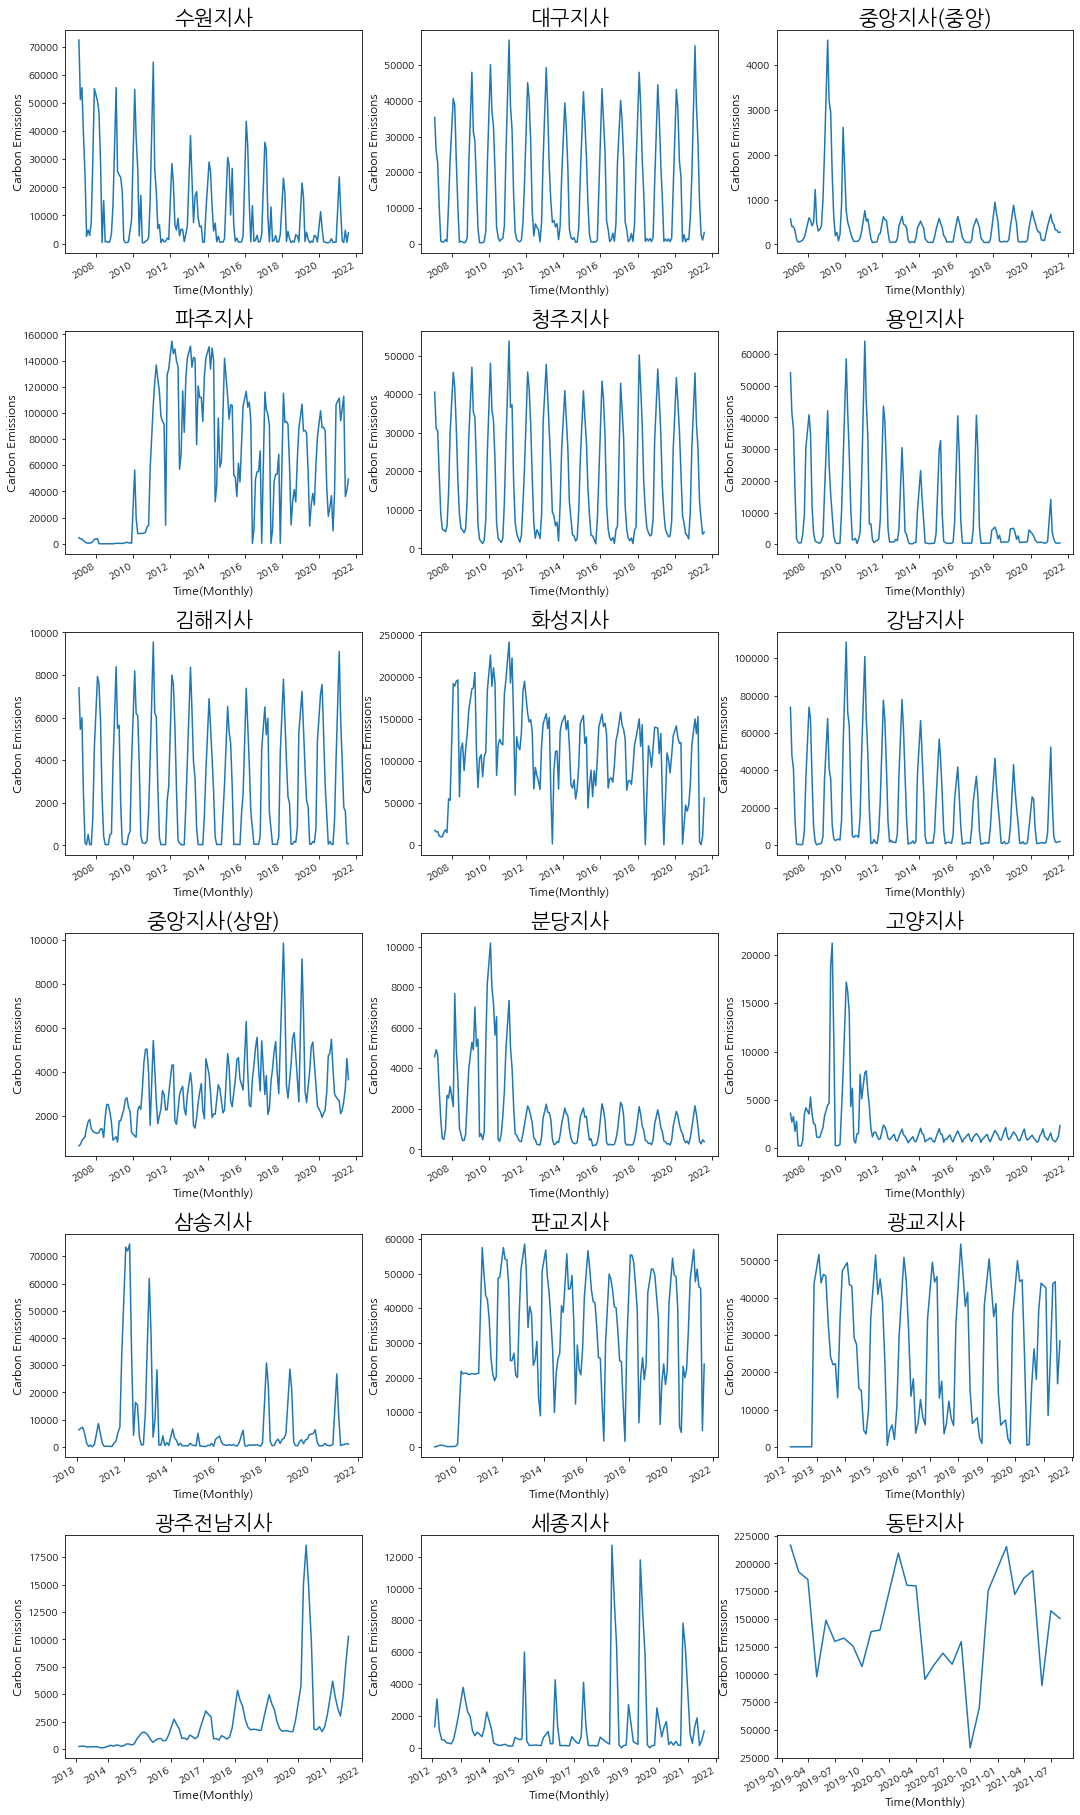

In [77]:
# fig, ax = plt.subplots(figsize=(16,8))
fig, axes = plt.subplots(6,3, constrained_layout=True, figsize = (20, 30))
plt.subplots_adjust(left=0.2, bottom=0.2,  right=0.9, top=1, wspace=0.2, hspace=0.35)
# fig, axes = plt.subplots(6,3, constrained_layout=True, figsize = (20, 30))
for name, ax in zip(names, axes.flatten()):
#     dff_data[name].plot(x = dff_data.index, y='Value', ax = ax, title=name, fontsize = 20)
    dff_data[name].plot(x = dff_data.index, y='Value', ax = ax)
    ax.set_title(name,fontsize= 21)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

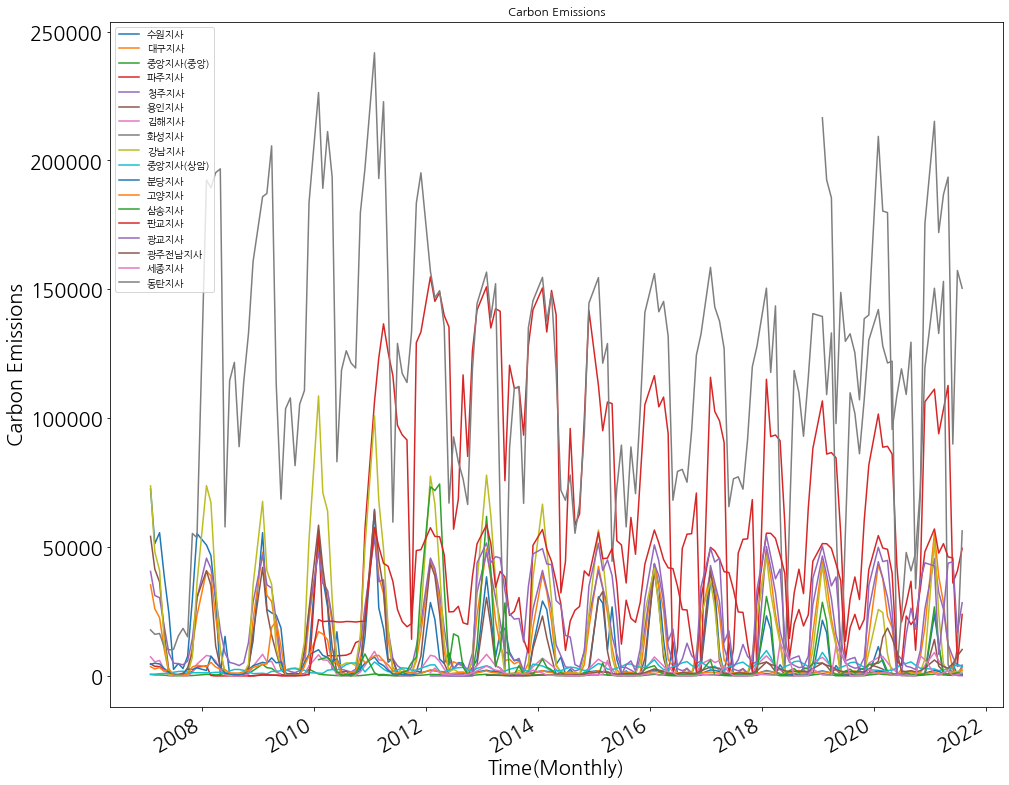

In [78]:
# fig, ax = plt.subplots(figsize=(16,8))
fig, ax = plt.subplots()
for name in names:
    dff_data[name].plot(x = dff_data.index, y='Value', label=name,ax = ax, title='Carbon Emissions', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 10)
#     ax.legend(fontsize = 16, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
#     fancybox=True, shadow=True, ncol=5)

In [79]:
names1 = ['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사']

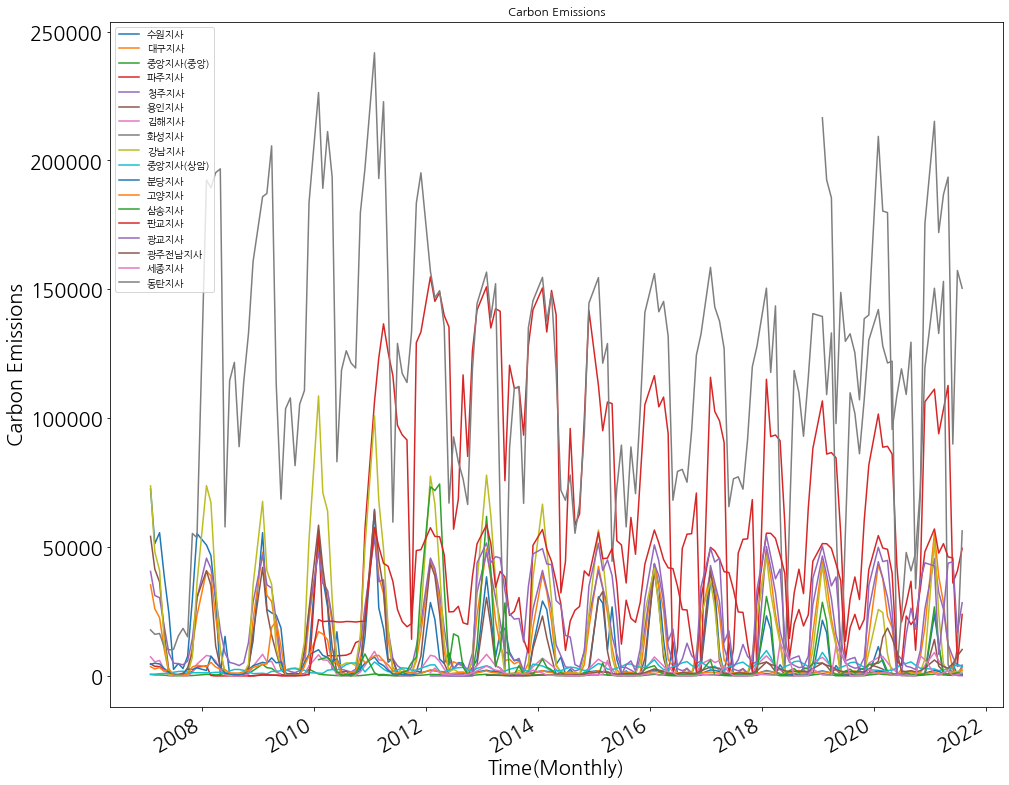

In [80]:
# fig, ax = plt.subplots(figsize=(16,8))
fig, ax = plt.subplots()
for name in names:
    dff_data[name].plot(x = dff_data.index, y='Value', label=name,ax = ax, title='Carbon Emissions', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 10)
#     ax.legend(fontsize = 16, loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)
#     fancybox=True, shadow=True, ncol=5)

In [81]:
dff_data1 = dff_data[['수원지사', '대구지사', '중앙지사(중앙)', '파주지사', '청주지사', '용인지사', '김해지사', '화성지사', '강남지사', '중앙지사(상암)', '분당지사', '고양지사']]

In [82]:
dff_data1['sum'] = dff_data1.sum(axis=1)
dff_data1.head(5)

수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     김해지사  \
date                                                                        
2007-01-31  72529.7    35333  571.013   4661.6  40552.1    54150  7407.09   
2007-02-28    51314  26056.6  401.937  3743.26  31208.1  41422.5  5456.73   
2007-03-31  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  5996.73   
2007-04-30  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  2410.25   
2007-05-31  24243.4  742.904  113.084  1281.08  8832.66  1703.62  122.787   

               화성지사     강남지사 중앙지사(상암)     분당지사     고양지사            sum  
date                                                                    
2007-01-31    17862  73748.4  632.854  4569.34  3621.53  315638.591522  
2007-02-28  16150.8  48082.1  687.108  4917.67  2694.17  232134.952682  
2007-03-31    16465    40928  870.946  4667.16  3282.06  221241.763065  
2007-04-30  11342.1  13520.8  962.725  2920.41  1744.44  121163.729635  
2007-05-31  10099.5  634.321  1052.37  1471.21  2764.01   53061.023459

Text(0, 0.5, 'Carbon Emissions')

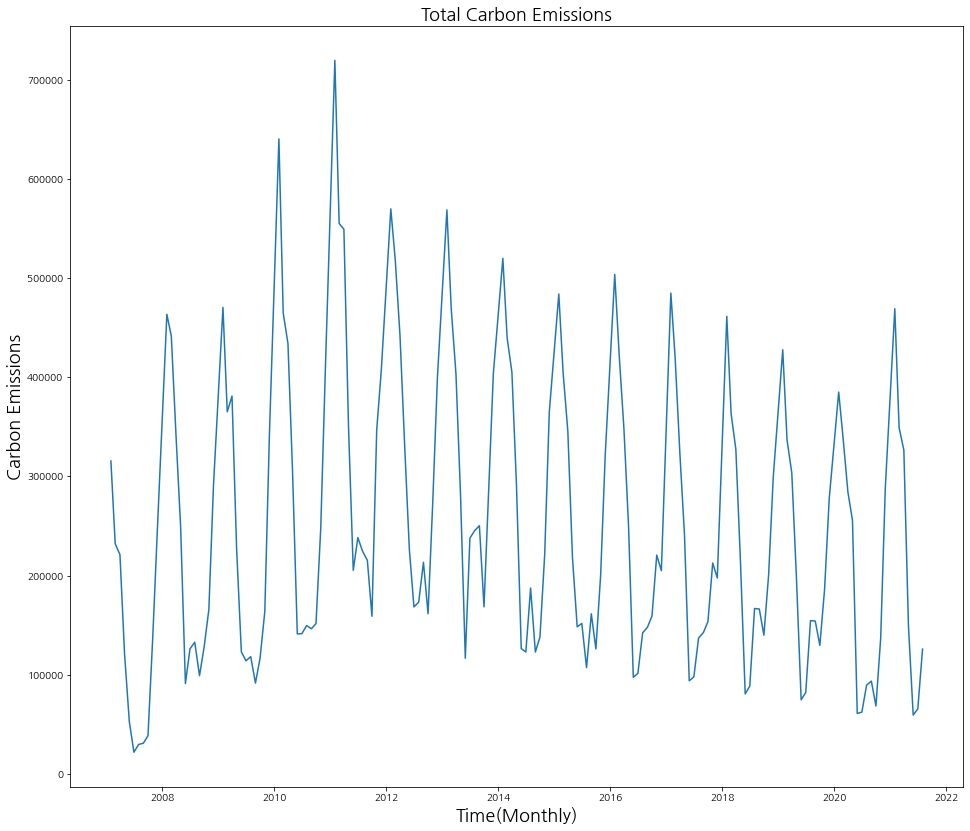

In [87]:
plt.title("Total Carbon Emissions", fontsize=18)
plt.plot(dff_data.index, dff_data1['sum'].values)
plt.xlabel('Time(Monthly)', fontsize=18)
plt.ylabel('Carbon Emissions', fontsize=18)

In [88]:
TestStationaryAdfuller(dff_data1['sum'])

Test Statistic                  -1.240257
p-value                          0.656043
#Lags Used                      13.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


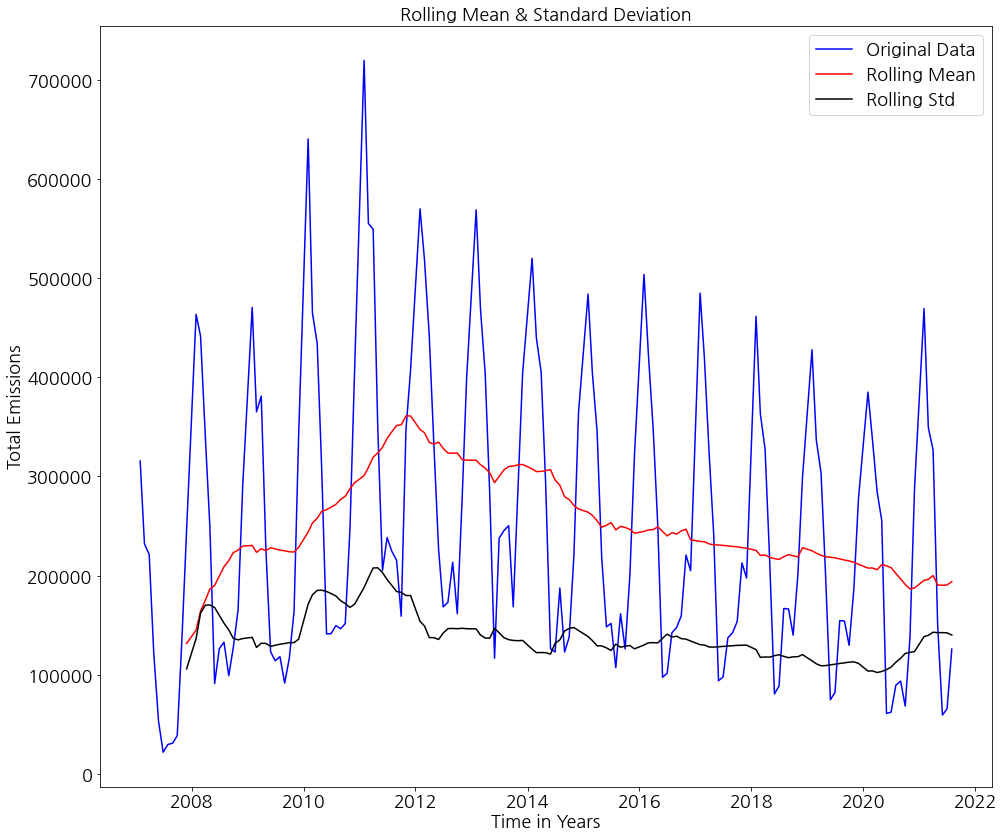

In [89]:
TestStationaryPlot(dff_data1['sum'])

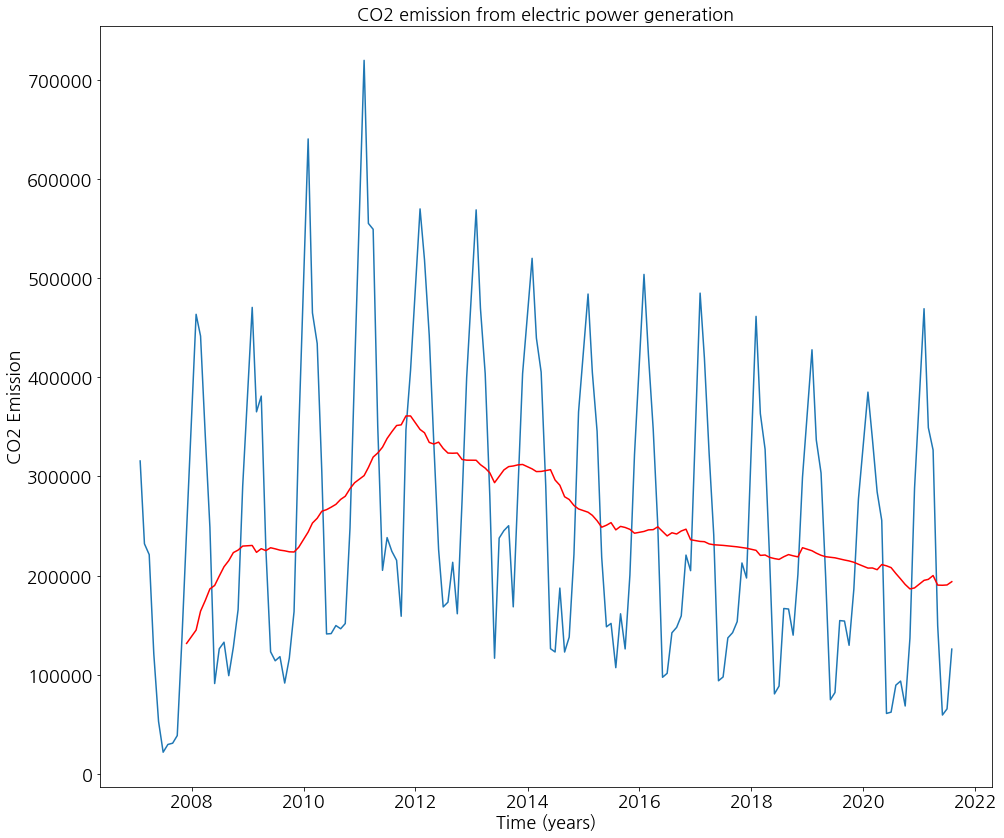

In [90]:
moving_avg1 = dff_data1['sum'].rolling(11).mean()
plt.plot(dff_data1['sum'])
plt.plot(moving_avg1, color='red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time (years)', fontsize = 18)
plt.ylabel('CO2 Emission', fontsize = 18)
plt.title('CO2 emission from electric power generation', fontsize = 18)
plt.show()

In [91]:
dff_data1_moving_avg_diff = dff_data1['sum'] - moving_avg1
dff_data1_moving_avg_diff.head(13)

date
2007-01-31              NaN
2007-02-28              NaN
2007-03-31              NaN
2007-04-30              NaN
2007-05-31              NaN
2007-06-30              NaN
2007-07-31              NaN
2007-08-31              NaN
2007-09-30              NaN
2007-10-31              NaN
2007-11-30    114259.043645
2008-01-31    318335.273184
2008-02-29    277365.191286
Name: sum, dtype: float64

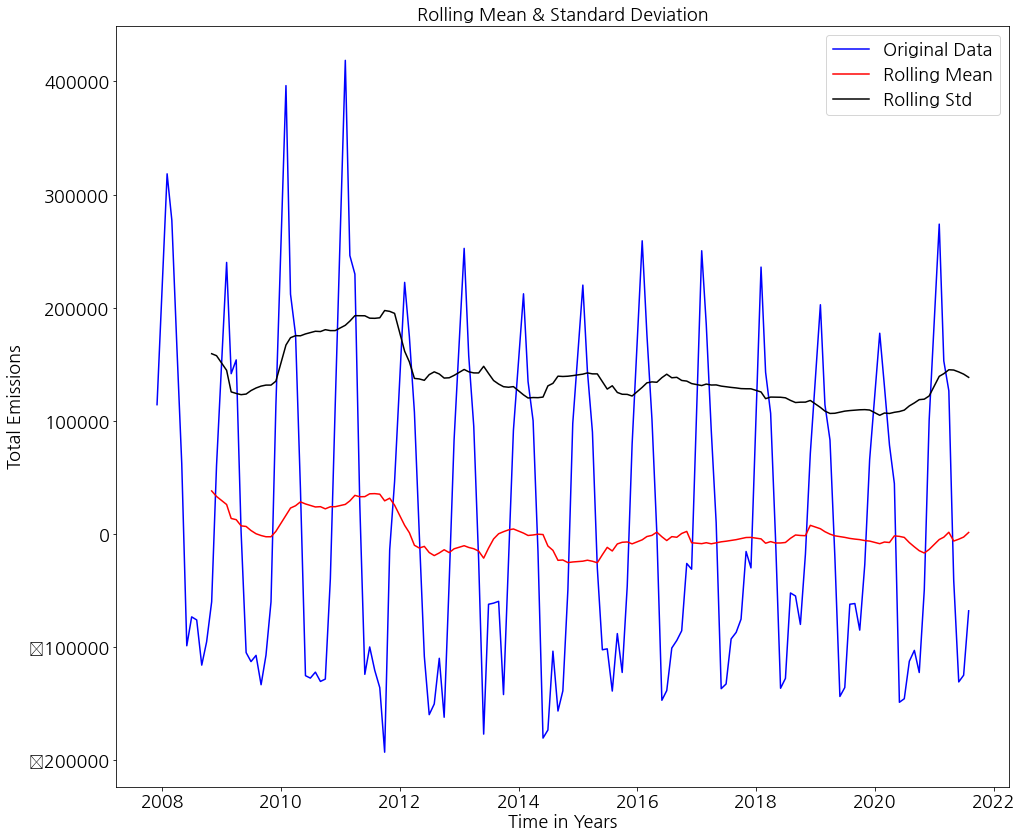

In [92]:
dff_data1_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(dff_data1_moving_avg_diff)

In [93]:
TestStationaryAdfuller(dff_data1_moving_avg_diff)

Test Statistic                  -2.752172
p-value                          0.065437
#Lags Used                      12.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [94]:
# 95% 신뢰구간 

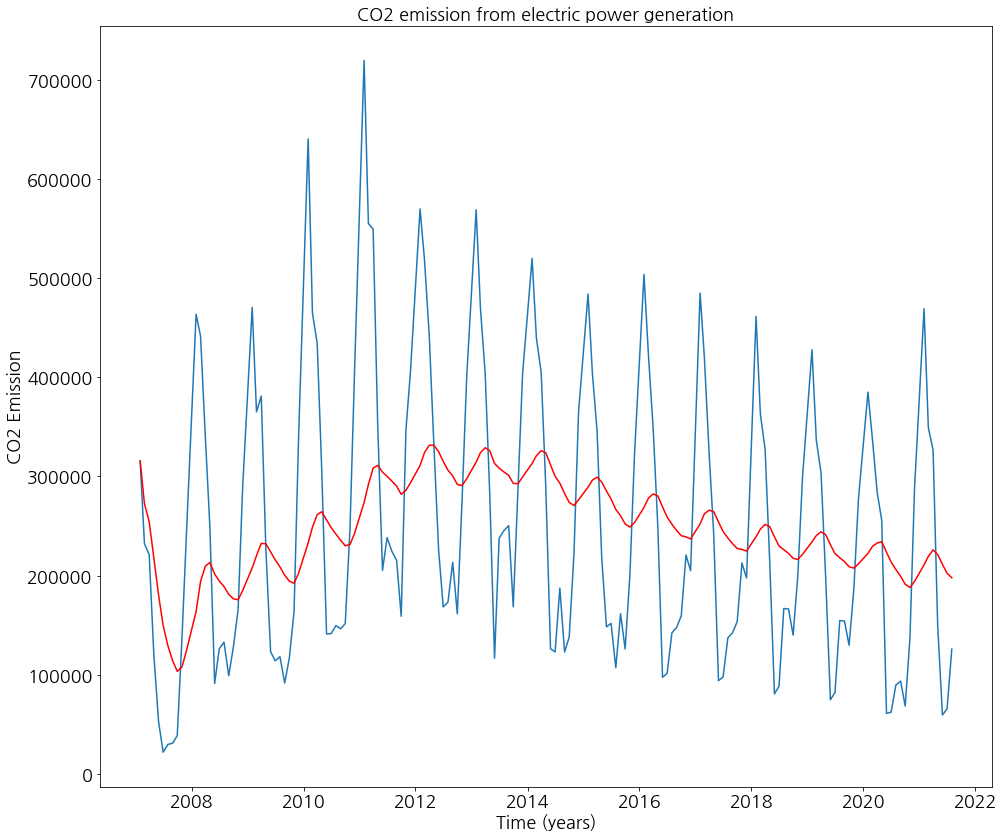

In [95]:
exp_wighted_avg1 = dff_data1['sum'].ewm(halflife=11).mean()
plt.plot(dff_data1['sum'])
plt.plot(exp_wighted_avg1, color='red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time (years)', fontsize = 18)
plt.ylabel('CO2 Emission', fontsize = 18)
plt.title('CO2 emission from electric power generation', fontsize = 18)
plt.show()

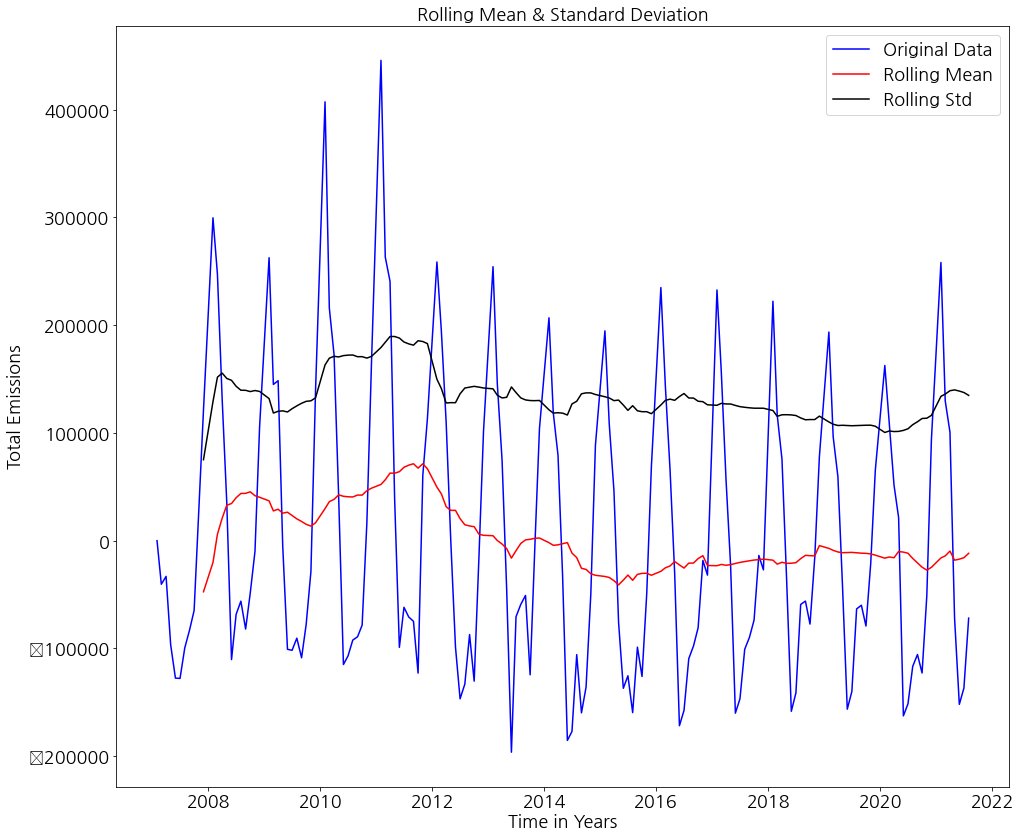

In [96]:
dff_data1_ewma_diff = dff_data1['sum'] - exp_wighted_avg1
TestStationaryPlot(dff_data1_ewma_diff)

In [97]:
TestStationaryAdfuller(dff_data1_ewma_diff)

Test Statistic                  -1.621575
p-value                          0.471904
#Lags Used                      12.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


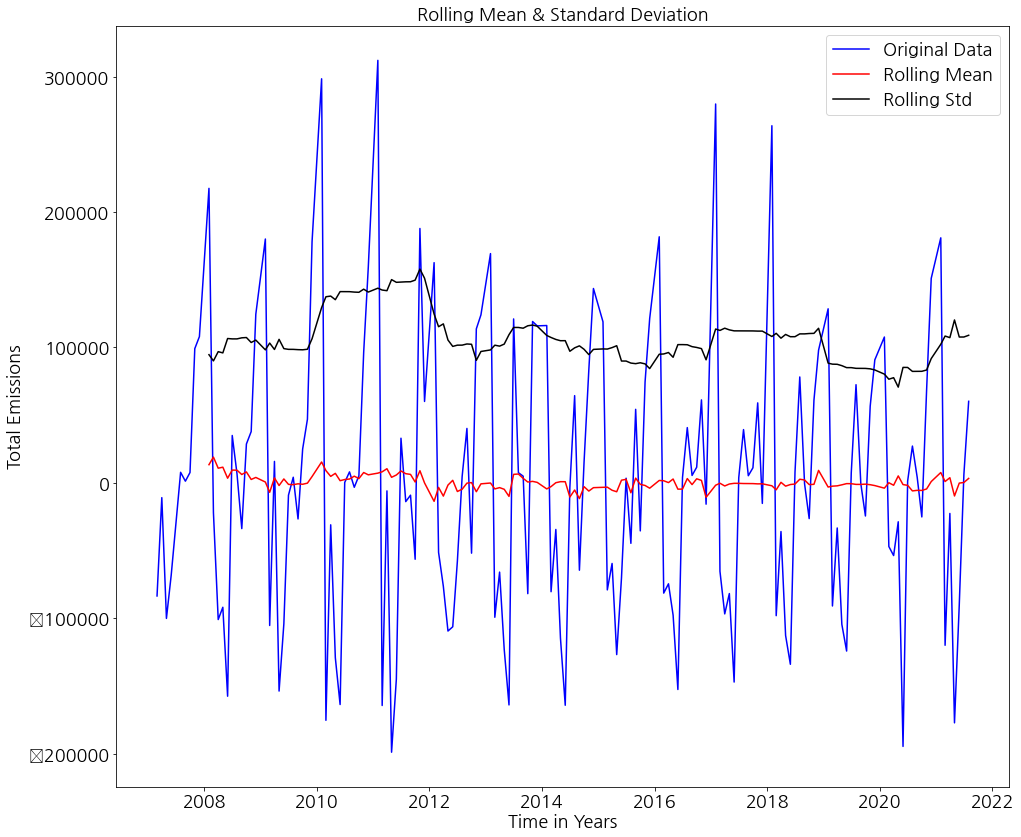

In [98]:
dff_data1_first_difference = dff_data1['sum'] - dff_data1['sum'].shift(1)  
TestStationaryPlot(dff_data1_first_difference.dropna(inplace=False))

In [99]:
TestStationaryAdfuller(dff_data1_first_difference.dropna(inplace=False))

Test Statistic                  -4.459099
p-value                          0.000233
#Lags Used                      12.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


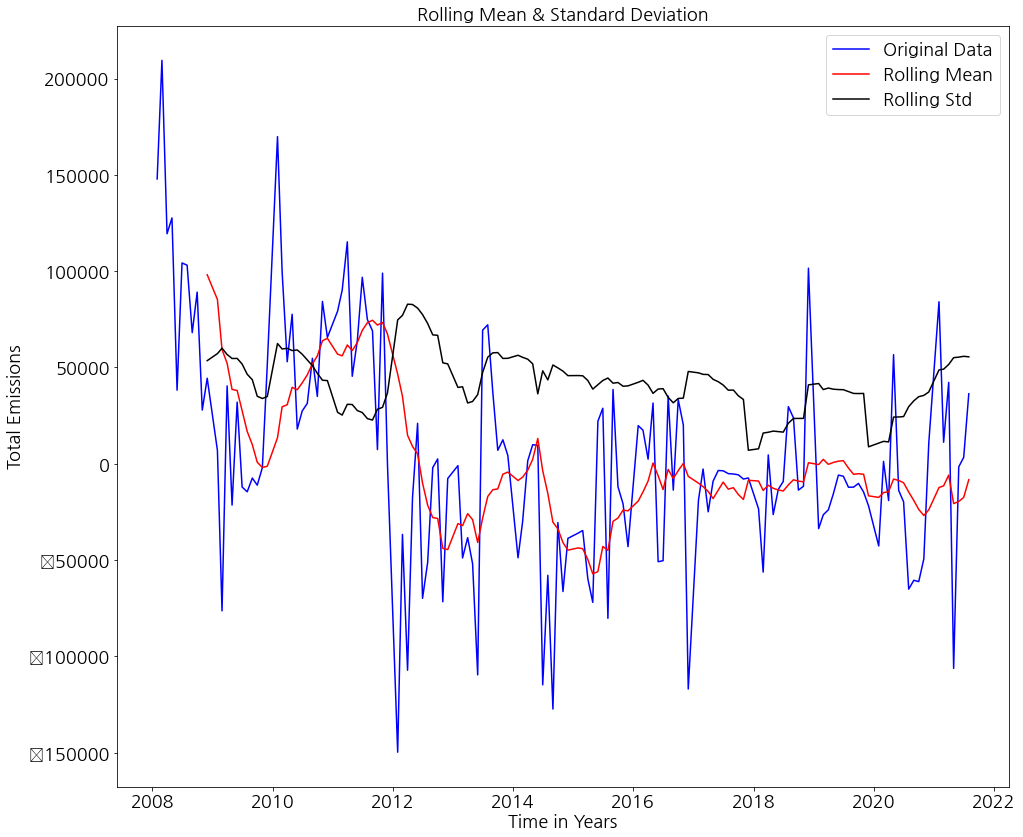

Test Statistic                  -2.826224
p-value                          0.054624
#Lags Used                      11.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [100]:
dff_data1_seasonal_difference = dff_data1['sum'] - dff_data1['sum'].shift(11)  
TestStationaryPlot(dff_data1_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(dff_data1_seasonal_difference.dropna(inplace=False))

In [101]:
dff_data['sum'] = dff_data.sum(axis=1)
dff_data.head(5)

수원지사     대구지사 중앙지사(중앙)     파주지사     청주지사     용인지사     김해지사  \
date                                                                        
2007-01-31  72529.7    35333  571.013   4661.6  40552.1    54150  7407.09   
2007-02-28    51314  26056.6  401.937  3743.26  31208.1  41422.5  5456.73   
2007-03-31  55578.8  22592.7   396.55  3636.62  30376.9  36450.3  5996.73   
2007-04-30  38927.1  10383.3  308.847  2380.21  19290.9  16972.7  2410.25   
2007-05-31  24243.4  742.904  113.084  1281.08  8832.66  1703.62  122.787   

               화성지사     강남지사 중앙지사(상암)     분당지사     고양지사 삼송지사 판교지사 광교지사 광주전남지사  \
date                                                                            
2007-01-31    17862  73748.4  632.854  4569.34  3621.53  NaN  NaN  NaN    NaN   
2007-02-28  16150.8  48082.1  687.108  4917.67  2694.17  NaN  NaN  NaN    NaN   
2007-03-31    16465    40928  870.946  4667.16  3282.06  NaN  NaN  NaN    NaN   
2007-04-30  11342.1  13520.8  962.725  2920.41  1744.44  NaN  NaN  NaN    NaN   
2007-05-31  10099.5  634.321  1052.37  1471.21  2764.01  NaN  NaN  NaN    NaN   

           세종지사 동탄지사            sum  
date                                 
2007-01-31  NaN  NaN  315638.591522  
2007-02-28  NaN  NaN  232134.952682  
2007-03-31  NaN  NaN  221241.763065  
2007-04-30  NaN  NaN  121163.729635  
2007-05-31  NaN  NaN   53061.023459

Text(0, 0.5, 'Carbon Emissions')

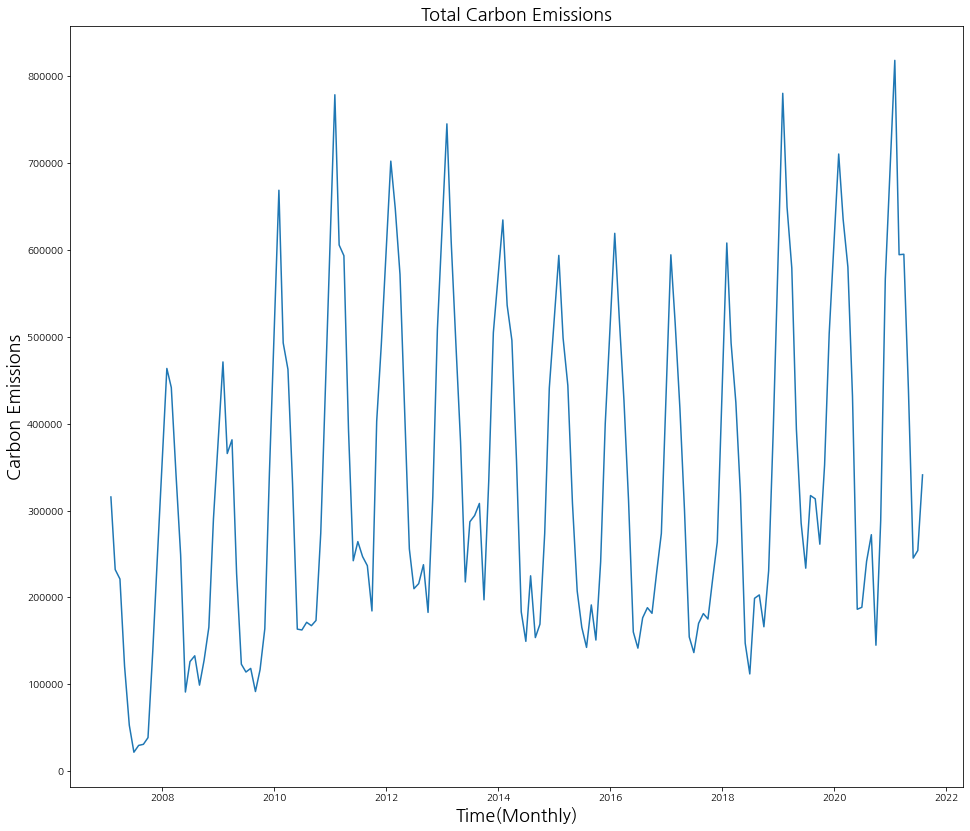

In [102]:
plt.title("Total Carbon Emissions", fontsize=18)
plt.plot(dff_data.index, dff_data['sum'].values)
plt.xlabel('Time(Monthly)', fontsize=18)
plt.ylabel('Carbon Emissions', fontsize=18)

In [103]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 11, center = False).mean()
    rol_std = ts.rolling(window = 11, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.xlabel('Time in Years', fontsize = 18)
    plt.ylabel('Total Emissions', fontsize = 18)
    plt.legend(loc='best', fontsize = 18)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
    plt.show(block= True)

In [104]:
# 통계 파라메트릭 음성합성기의 음질은 심층신경망의 도입으로 인해 크게 향상되었다. 심층신경망은 언어특징벡터와 음성특징벡터간의 복잡(complex)하고 비선형적, 고차원 관계를 표현하는데 있어 전통적인 방법인 은닉 마르코프 모델보다 좋은 성능을 보여준다. 최근 몇 년간 엔드투엔드 구조를 가지는 음성합성 구조가 제안되었다. 하지만 이러한 알고리즘들은 소용량 코퍼스 환경에서 급격한 성능저하를 보이며 높은 계산량을 필요로 하는 단점이 있다. 이러한 이유로 제한된 환경에서는 통계 파라메트릭 음성합성기가 여전히 유용하다고 할 수 있다. 여러가지 심층신경망을 활용한 통계 파라메트릭 구조가 제안되었다. 이러한 구조들은 일반적으로 선형출력층을 가지며 최소 평균제곱오차(MSE: Mean Squared Error) 기준(criterion)으로 훈련되며, 최대 우도 파라미터 생성(MLPG: Maximum Likliehood Parameter Generation) 알고리즘을 이용하여 파라미터를 생성한다. 하지만 이때 2가지 주요한 문제가 발생한다: MSE 기준으로 인한 프레임간 독립 문제와 선형출력층으로 인한 유니모달(unimnodal) 가정 문제이다. 고음질의 음성합성을 위해서는 음성의 시간축에서의 정보가 필수적이지만 MSE 기준은 정적 특징벡터와 동적 특징벡터간의 관계를 어긋나게 만든다. 이러한 단점을 보안하기 위해 최소 궤적 오차(MTE: Minimum Trajectory Error)가 제안되었다. MTE 기준은 정적-동적 제약을 MSE 기준에 추가함으로써 시간축에서 자연스러운 특징벡터 궤적을 생성한다. 하지만 생성된 특징벡터는 선형출력층 문제로 인해 과평활화(over-s0moothing) 되어있다. 혼합 밀도 신경망(MDN: Mixture Density Network) 출력층은 이러한 문제를 해결할 수 있다. MDN의 여러 개의 가우시안 혼합이 음성의 멀티모달(multimodal) 특성을 반영함으로써 과평활화 문제를 일부 해결하였다. 그럼에도 불구하고 MSE 기준과 마찬가지로 시간축에서의 정보를 활용하지 못함으로써 부자연스러운 궤적을 생성한다. 과평활화 문제를 해결하기 위한 또 하나의 방법은 생성된 특징벡터의 분석 특징을 사용하는 것이다. 이러한 분석 특징 중엔 인지적인 단서라고 알려진 전역 분산(GV: Global Variance)과 변조 스펙트럼(MS: Modulation Spectrum)이 대표적이다. 훈련/합성과정에서 GV와 MS를 제약으로 활용함으로써 합성음의 명료성을 향상시킬 수 있다. 하지만 이러한 방법은 음성의 멀티모달 특성을 반영하는 것이 아니라 음성과 비슷하도록 궤적의 변화를 급격하게 만드는 데에만 집중한다. 본 논문에서는 과평활화 문제와 부자연스러운 궤적 문제를 해결하기위해 MDN에 MTE 기준을 적용하는 훈련 알고리즘을 제안한다. MTE 기준을 적용하기 위해 최확혼합(MPM: Most Probable Mixture)를 활용하여 전통적 MLPG 알고리즘을 폐형(closed-form)으로 수식화하였다. 제안 알고리즘은 정적-동적 제약을 도입하였을 뿐만 아니라 음성의 멀티모달 특성을 반영할 수 있기 때문에 전통적방법보다 좀 더 자연스럽고 명료한 합성음을 생성할 수 있다. 추가적인 성능 개선을 위해, MS 제약과 적대적 생성 신경망을 손실함수에 적용함으로써 과평활화 문제를 한번 더 감쇄시켰다. 합성음질 평가를 위해 객관적, 주관적 평가를 실시하였고 제안된 알고리즘이 합성음질을 향상시켰다는 것을 확인하였다.

In [105]:
# Augmented Dickey Fuller(ADF) 검정은 정상성을 알아보기 위한 단위근 검정 방법
# 검정을 시행하기 위해서는 시차의 길이를 선택해야 한다

In [106]:
# Test Stationary 정상성? 평균, 분산, 공분산 및 기타 모든 분포적 특성이 일정함을 의미
# 정상성의 특징 : 언제 관찰하는지에 상관이 없고, 시간에 따라 어떤 시점에서 보더라도 똑같이 보일 것이기 때문입니다.
# 시계열이 정상적이다? => 시간의 흐름에 따라 "통계적 특성(평균, 분산, 공분산)"이 변하지 않는것

In [107]:
# 정상화 목적
# (1) 시계열 모형은 데이터가 정상적이라고 가정한다 => 정상적이여야 분석효과가 높다
# (2) 잔차검증 역시 정상화임을 가정하고 수행한다

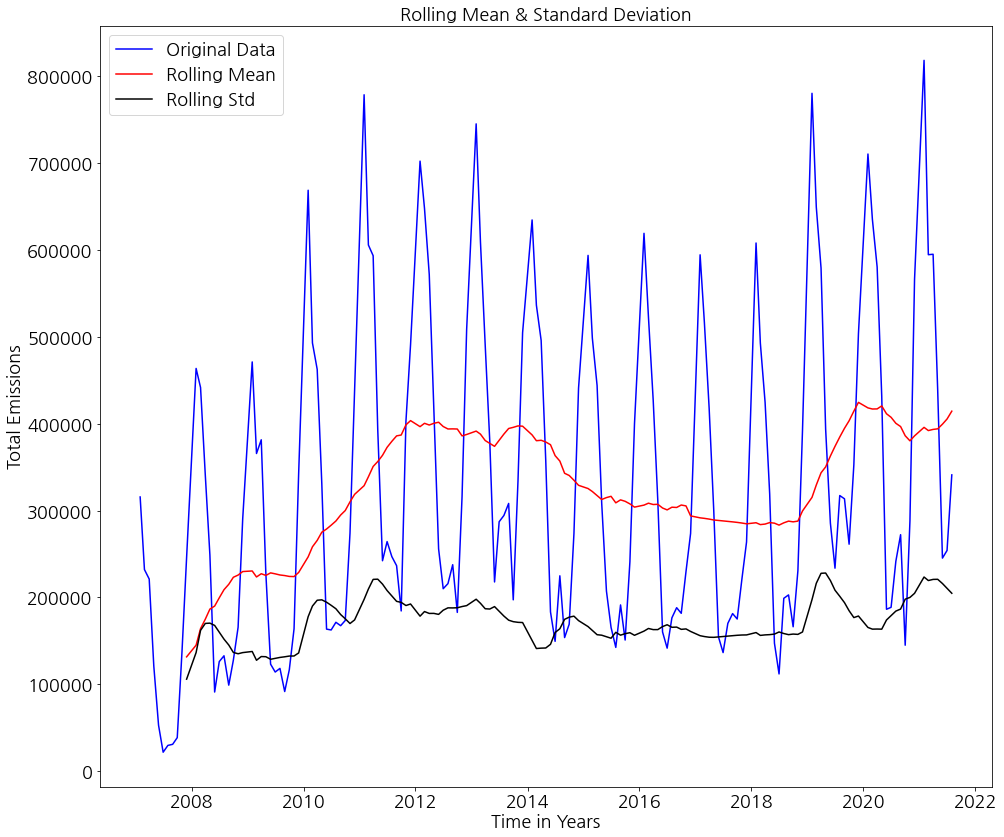

In [108]:
TestStationaryPlot(dff_data['sum'])

In [109]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [110]:
TestStationaryAdfuller(dff_data['sum'])

Test Statistic                  -1.514498
p-value                          0.526328
#Lags Used                      14.000000
Number of Observations Used    146.000000
Critical Value (1%)             -3.475953
Critical Value (5%)             -2.881548
Critical Value (10%)            -2.577439
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [111]:
# Test Statistic 검정통계량, 

In [112]:
adfuller(dff_data['sum'], autolag = 'AIC')[1]

0.5263276258083205

In [113]:
TestStationaryAdfuller(dff_data['분당지사'])

Test Statistic                  -1.679394
p-value                          0.441759
#Lags Used                      12.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


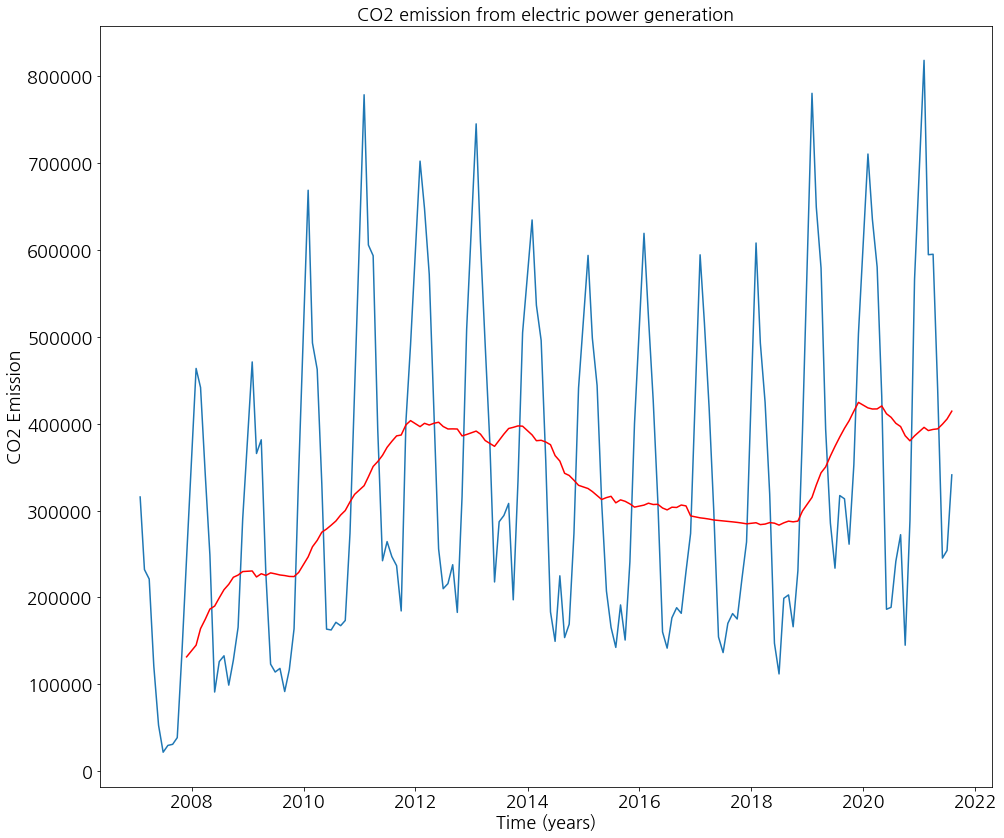

In [114]:
moving_avg = dff_data['sum'].rolling(11).mean()
plt.plot(dff_data['sum'])
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time (years)', fontsize = 18)
plt.ylabel('CO2 Emission', fontsize = 18)
plt.title('CO2 emission from electric power generation', fontsize = 18)
plt.show()

In [115]:
dff_data_moving_avg_diff = dff_data['sum'] - moving_avg
dff_data_moving_avg_diff.head(13)

date
2007-01-31              NaN
2007-02-28              NaN
2007-03-31              NaN
2007-04-30              NaN
2007-05-31              NaN
2007-06-30              NaN
2007-07-31              NaN
2007-08-31              NaN
2007-09-30              NaN
2007-10-31              NaN
2007-11-30    114259.043645
2008-01-31    318335.273184
2008-02-29    277365.191286
Name: sum, dtype: float64

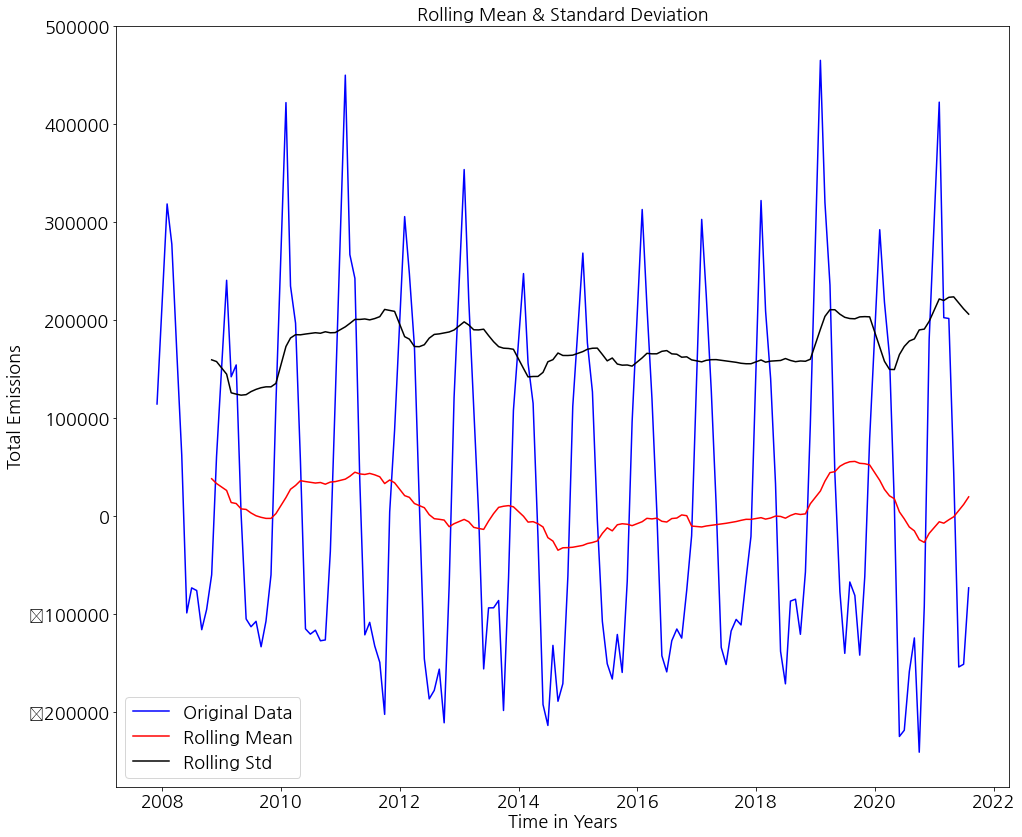

In [116]:
dff_data_moving_avg_diff.dropna(inplace=True)
TestStationaryPlot(dff_data_moving_avg_diff)

In [117]:
TestStationaryAdfuller(dff_data_moving_avg_diff)

Test Statistic                  -3.139234
p-value                          0.023783
#Lags Used                      14.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


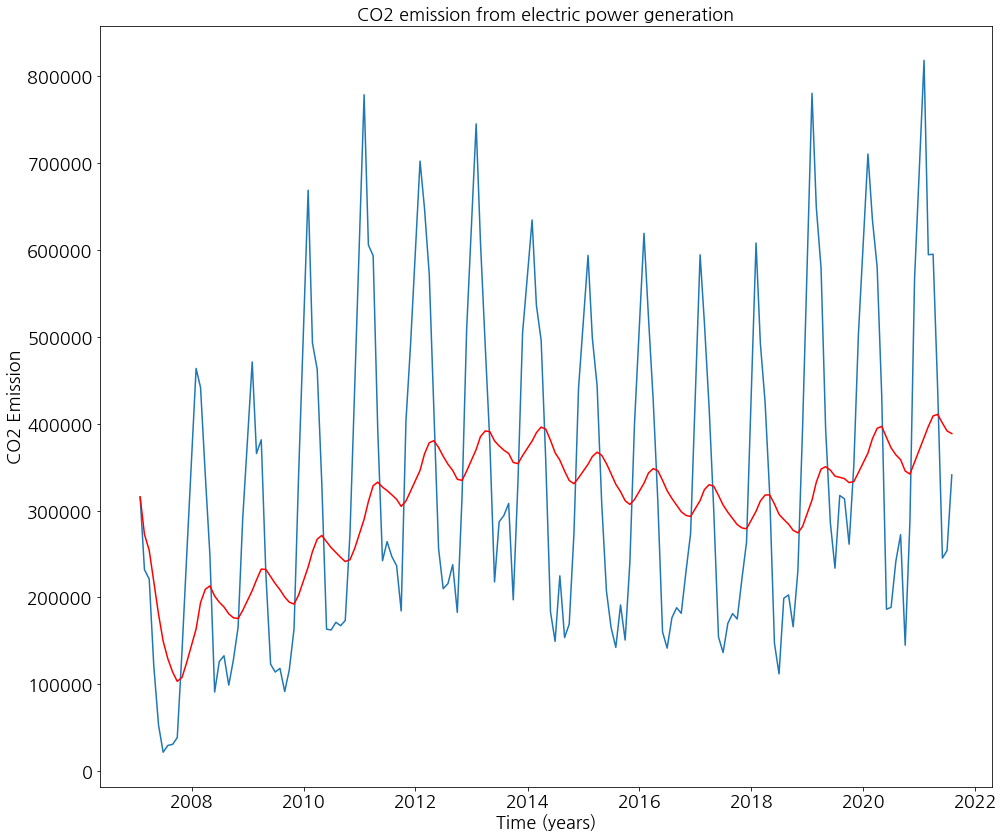

In [118]:
dff_data_exp_wighted_avg = dff_data['sum'].ewm(halflife=11).mean()
plt.plot(dff_data['sum'])
plt.plot(dff_data_exp_wighted_avg, color='red')
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Time (years)', fontsize = 18)
plt.ylabel('CO2 Emission', fontsize = 18)
plt.title('CO2 emission from electric power generation', fontsize = 18)
plt.show()

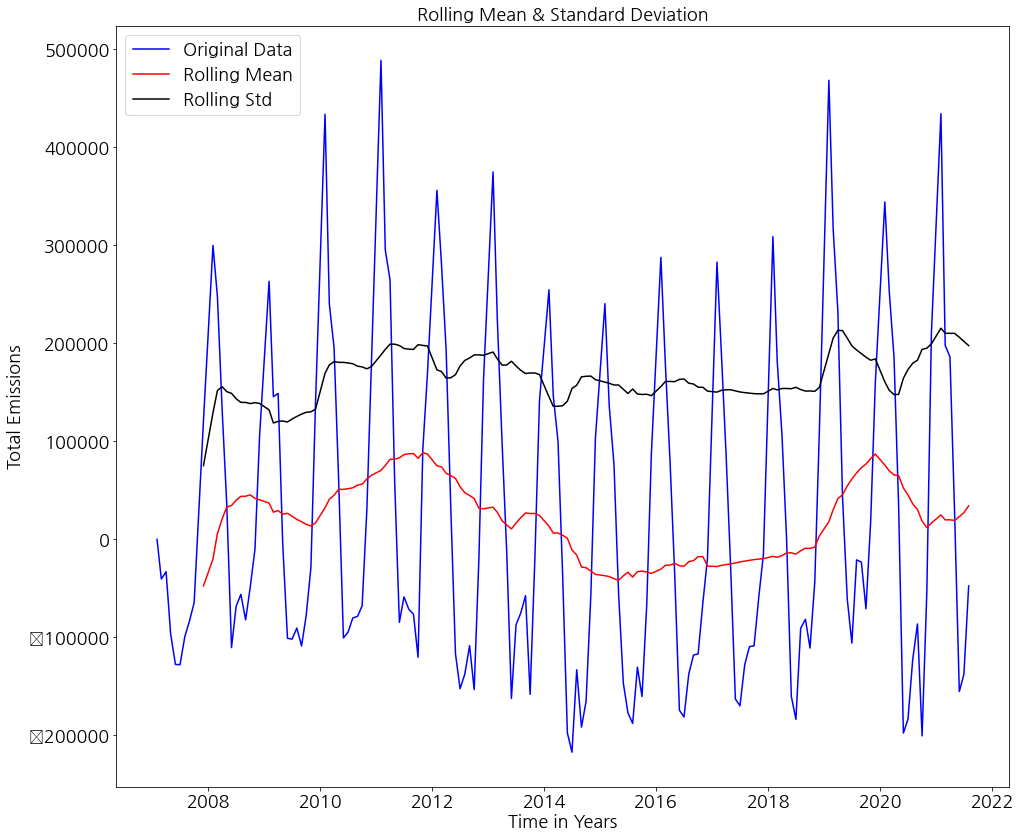

In [119]:
dff_data_ewma_diff = dff_data['sum'] - dff_data_exp_wighted_avg
TestStationaryPlot(dff_data_ewma_diff)

In [120]:
TestStationaryAdfuller(dff_data_ewma_diff)

Test Statistic                  -1.739543
p-value                          0.410863
#Lags Used                      12.000000
Number of Observations Used    148.000000
Critical Value (1%)             -3.475325
Critical Value (5%)             -2.881275
Critical Value (10%)            -2.577293
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


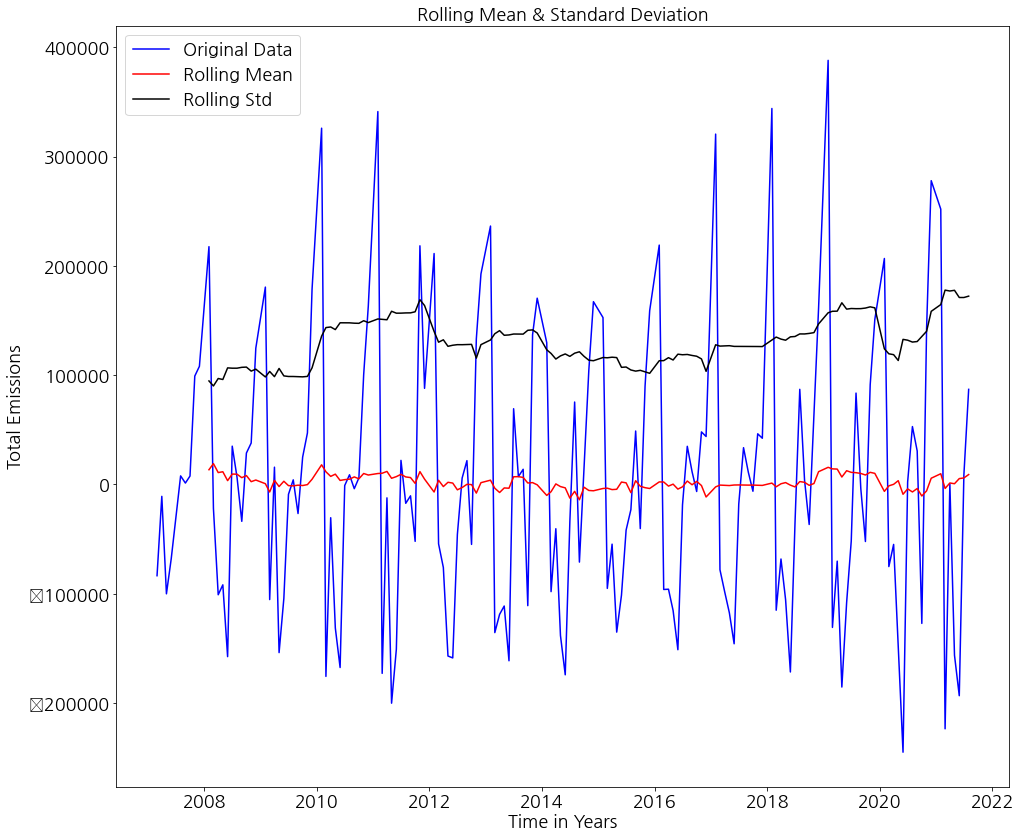

In [121]:
dff_data_first_difference = dff_data['sum'] - dff_data['sum'].shift(1)  
TestStationaryPlot(dff_data_first_difference.dropna(inplace=False))

In [122]:
TestStationaryAdfuller(dff_data_first_difference.dropna(inplace=False))

Test Statistic                  -3.570112
p-value                          0.006359
#Lags Used                      12.000000
Number of Observations Used    147.000000
Critical Value (1%)             -3.475637
Critical Value (5%)             -2.881410
Critical Value (10%)            -2.577365
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


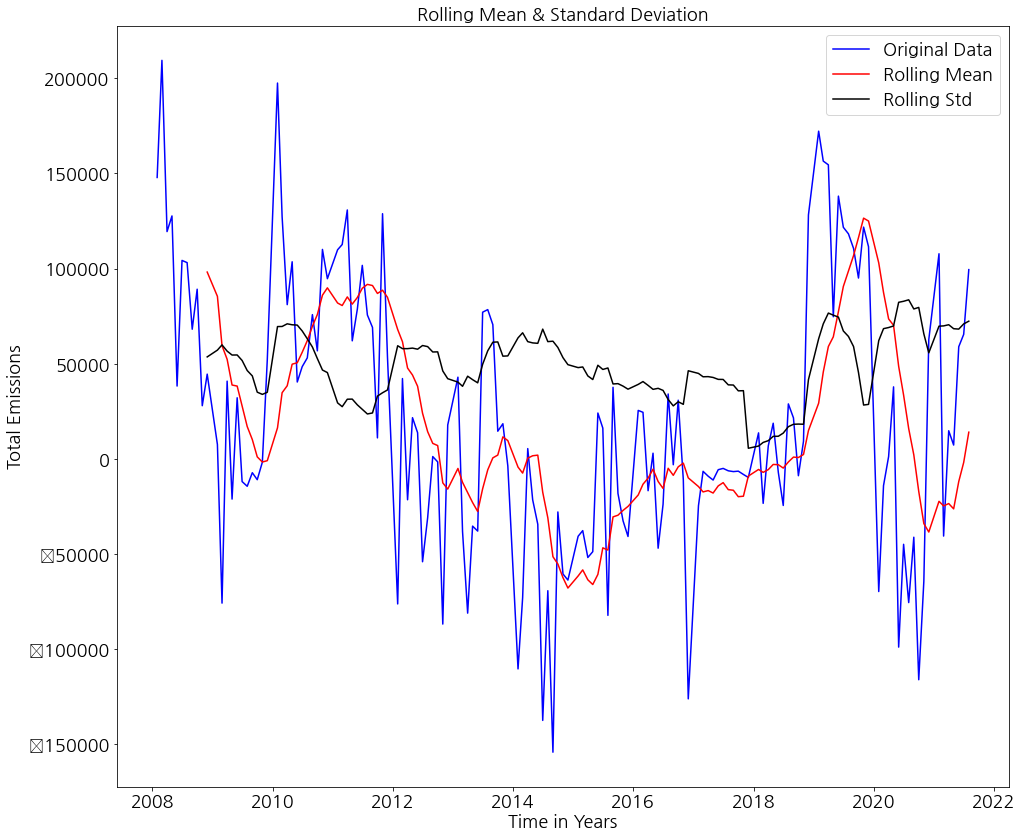

Test Statistic                  -2.933286
p-value                          0.041612
#Lags Used                      11.000000
Number of Observations Used    138.000000
Critical Value (1%)             -3.478648
Critical Value (5%)             -2.882722
Critical Value (10%)            -2.578065
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [123]:
dff_data_seasonal_difference = dff_data['sum'] - dff_data['sum'].shift(11)  
TestStationaryPlot(dff_data_seasonal_difference.dropna(inplace=False))
TestStationaryAdfuller(dff_data_seasonal_difference.dropna(inplace=False))

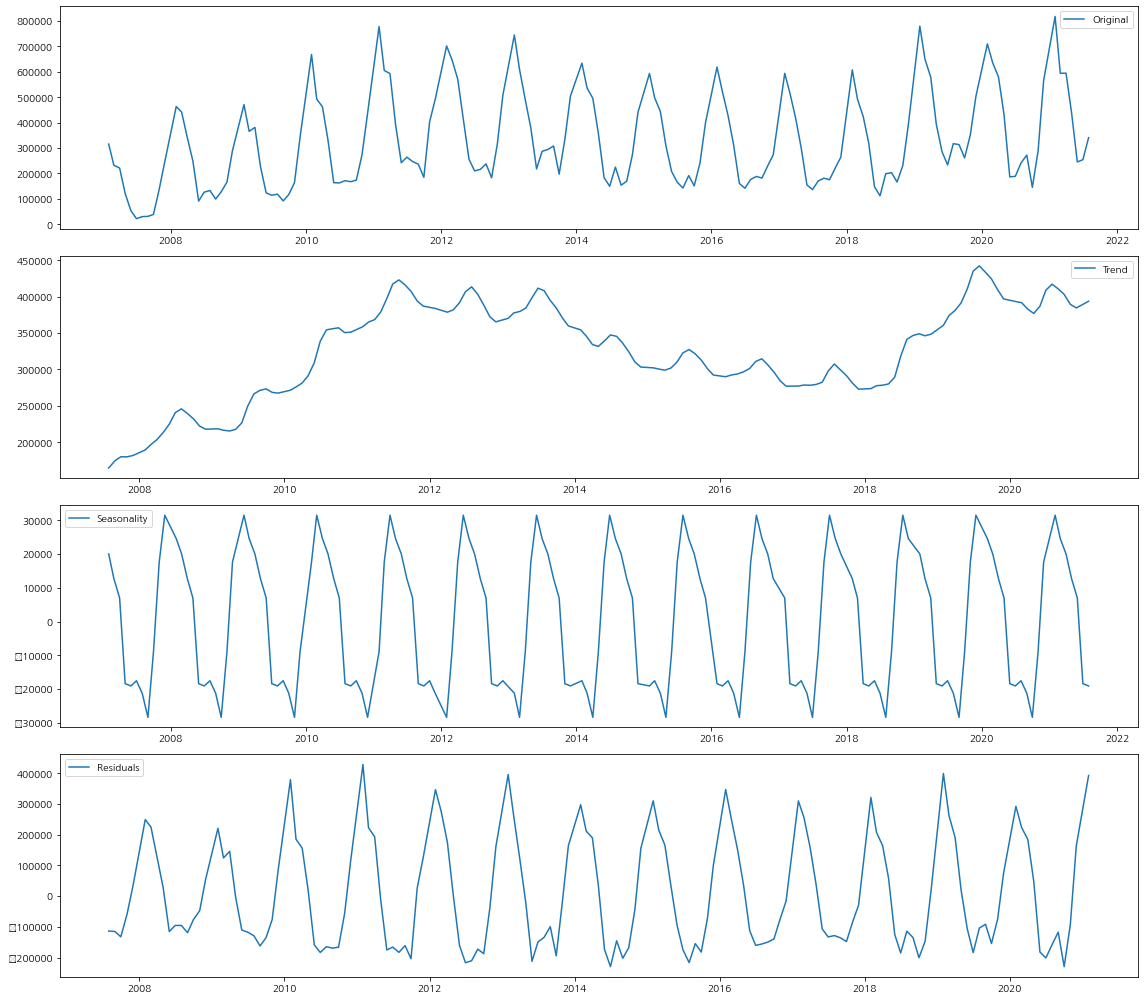

In [124]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(dff_data['sum'], period=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(dff_data['sum'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

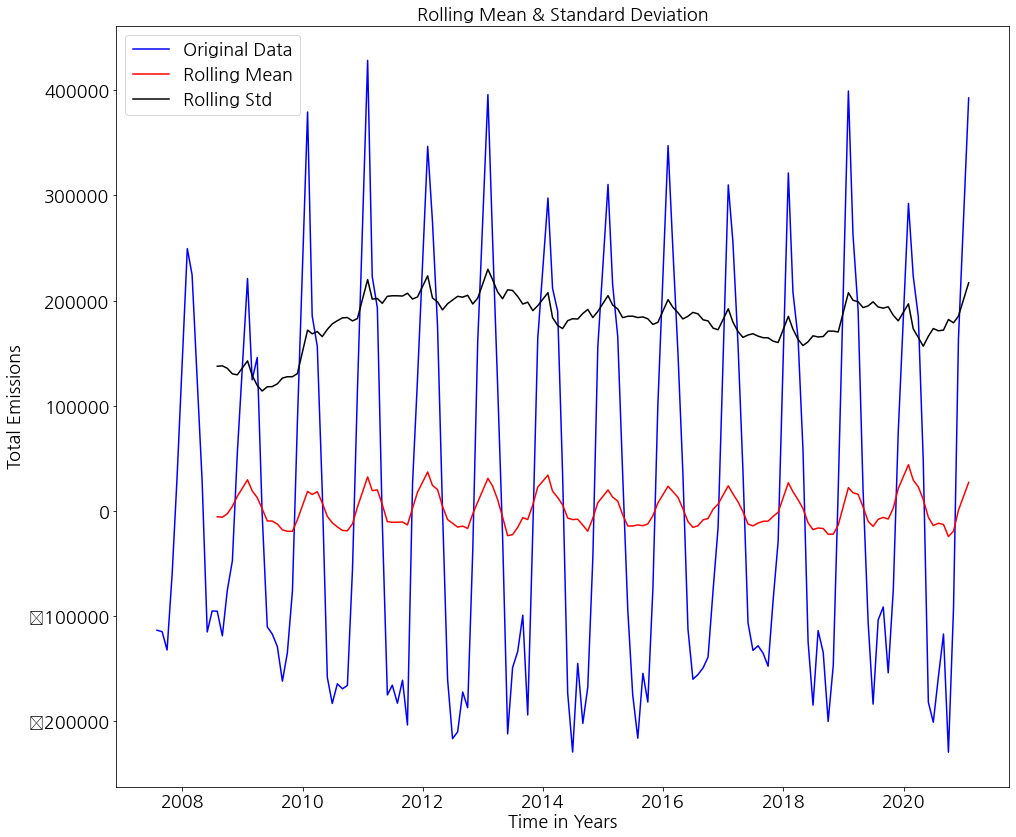

Test Statistic                  -5.139423
p-value                          0.000012
#Lags Used                      11.000000
Number of Observations Used    137.000000
Critical Value (1%)             -3.479007
Critical Value (5%)             -2.882878
Critical Value (10%)            -2.578149
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [133]:
dff_decompose = residual
dff_decompose.dropna(inplace=True)
TestStationaryPlot(dff_decompose)
TestStationaryAdfuller(dff_decompose)

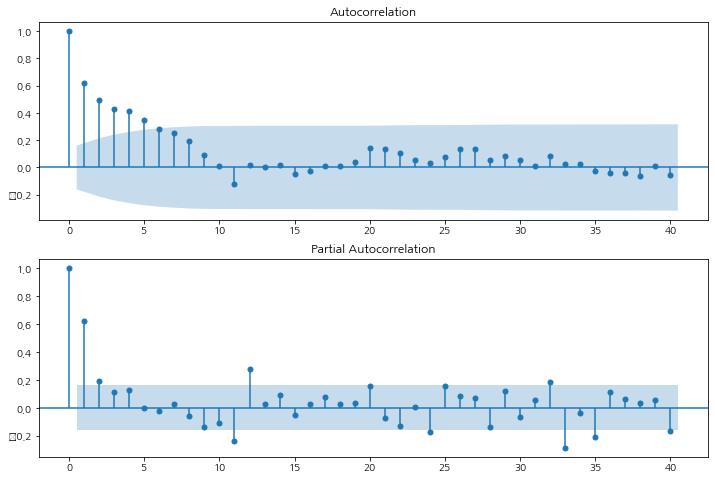

In [134]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dff_data_seasonal_difference.iloc[12:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dff_data_seasonal_difference.iloc[12:], lags=40, ax=ax2)

In [135]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [388]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(dff_data['sum'],
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [389]:
mod = sm.tsa.statespace.SARIMAX(dff_data['sum'], 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,11),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

result = results.get_prediction(start = 136, end = 160, dynamic=False)

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                sum   No. Observations:                  161
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 11)   Log Likelihood               -1661.408
Date:                            Wed, 08 Sep 2021   AIC                           3330.817
Time:                                    12:08:17   BIC                           3342.467
Sample:                                         0   HQIC                          3335.551
                                            - 161                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2791      0.150      1.856      0.063      -0.016       0.574
ma.L1         -0.7329      0.111   

In [390]:
dff_data.index[160]

Timestamp('2021-07-31 00:00:00')

<AxesSubplot:xlabel='date'>

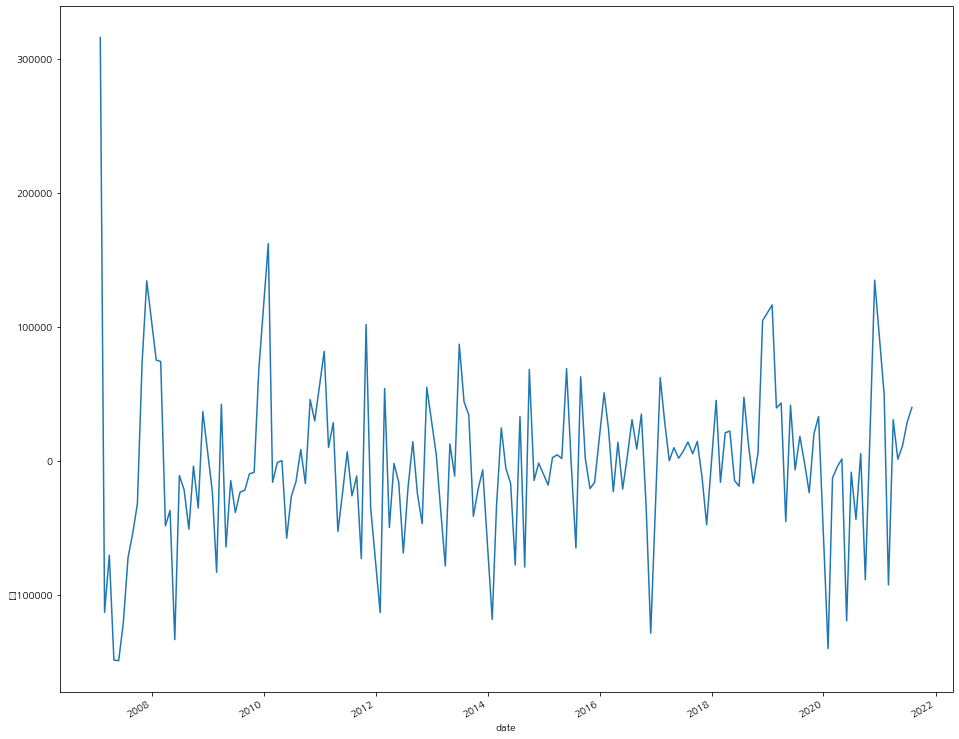

In [391]:
results.resid.plot()

In [392]:
print(results.resid.describe())

count       161.000000
mean      -3625.678063
std       60003.527680
min     -148873.175870
25%      -31983.758599
50%       -3840.099492
75%       28510.219114
max      315638.591522
dtype: float64


<AxesSubplot:ylabel='Density'>

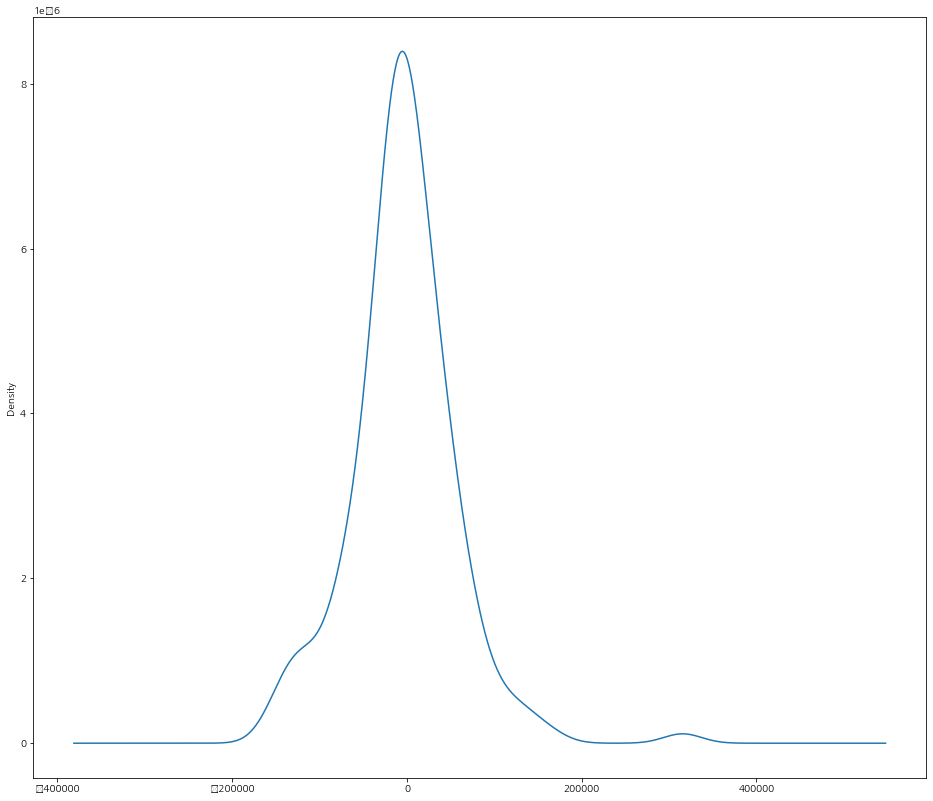

In [393]:
results.resid.plot(kind='kde')

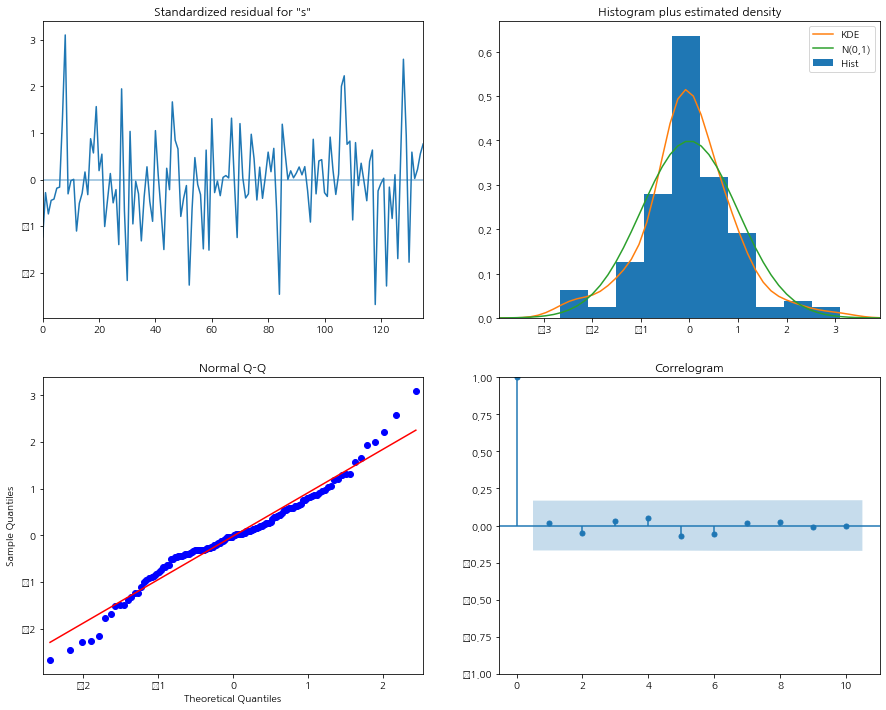

In [394]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [395]:
# pred = results.get_prediction(start = 480, end = 523, dynamic=False)
# pred = results.get_prediction(start= 161, end = 176, dynamic = False )
# pred_ci = pred.conf_int()
# pred_ci.head()

pred = results.get_prediction(start = 136, end = 160, dynamic=False)
# pred = results.get_prediction(start=dff_data.index[136], 
#                       end=dff_data.index[160],
#                       dynamic=False)

pred_ci = pred.conf_int()
pred_ci.head()

lower sum      upper sum
date                                    
2019-05-31  141662.281963  346457.807933
2019-06-30  137969.653816  342765.179785
2019-07-31  196545.994989  401341.520958
2019-08-31  213031.988659  417827.514629
2019-09-30  182568.919984  387364.445953

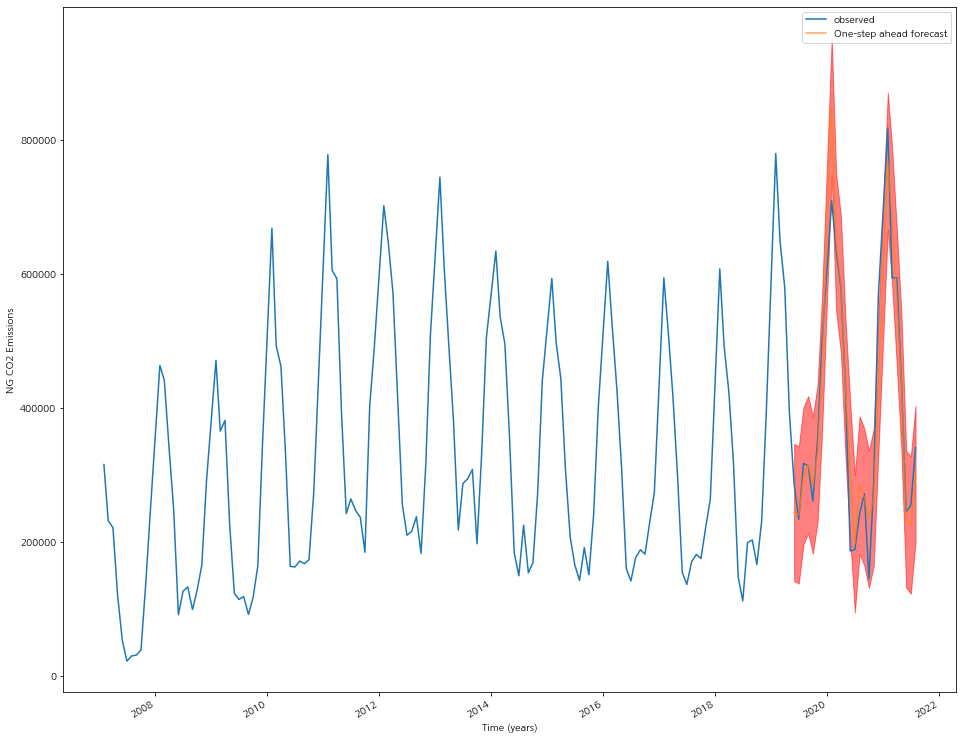

In [396]:
ax = dff_data['sum'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('NG CO2 Emissions')
plt.legend()

plt.show()

In [397]:
dff_forecast = pred.predicted_mean
dff_truth = dff_data['sum']['2019-05-31':]

# Compute the mean square error
mse = ((dff_forecast - dff_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'.format(np.sqrt(sum((dff_forecast-dff_truth)**2)/len(dff_forecast))))

The Mean Squared Error (MSE) of the forecast is 3242919106.55
The Root Mean Square Error (RMSE) of the forcast: 56946.6338


In [398]:
dff_pred_concat = pd.concat([dff_truth, dff_forecast])

In [399]:
pred_dynamic = results.get_prediction(start=dff_data.index[136], dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

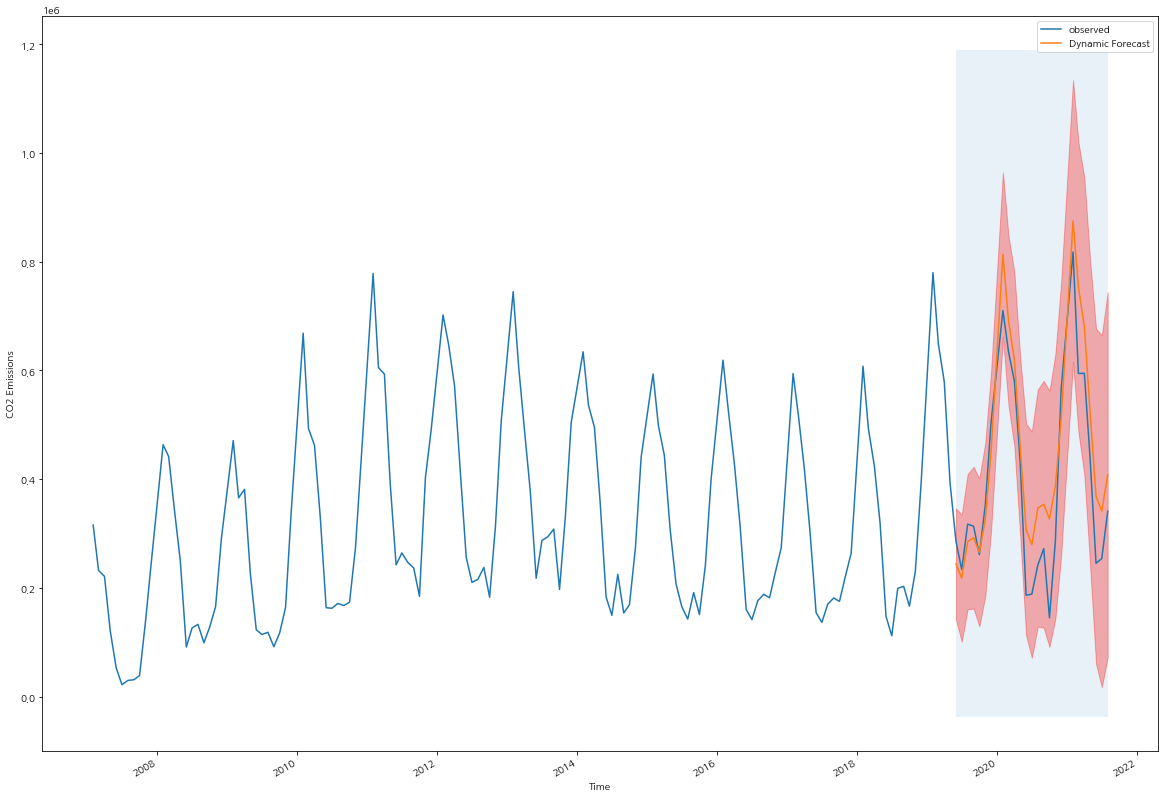

In [400]:
ax = dff_data['sum'].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2019-05-31'), 
                 dff_data['sum'].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

In [401]:
# Extract the predicted and true values of our time series
dff_d_forecast = pred_dynamic.predicted_mean
dff_d_orginal = dff_data['sum']['2019-05-31':]

# Compute the mean square error
mse = ((dff_d_forecast - dff_d_orginal) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((dff_d_forecast-dff_d_orginal)**2)/len(dff_d_forecast))))

The Mean Squared Error (MSE) of the forecast is 7211718133.13
The Root Mean Square Error (RMSE) of the forcast: 84921.8354


In [402]:
pred = results.get_prediction(start=dff_data.index[136], pd.to_datetime('2018-06-01')
                      end=dff_data.index[160],
                      dynamic=False)

In [ ]:
# 기간범위 : 200701 - 202107
df_date = pd.date_range('20070101', '20210802', freq='M')
df_date
len(df_date)

In [415]:
pd.to_datetime('2018-06-01')

Timestamp('2018-06-01 00:00:00')

In [ ]:
pd.date_range('20210802', '20230802', freq='M')

In [403]:

3
4
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)

NameError: name 'differenced' is not defined

In [404]:
new_index = pd.period_range(ts_log.index[0], ts_log.index[-1], freq=ts_log.index.freq)
ts_log = ts_log.reindex(new_index)

NameError: name 'ts_log' is not defined

In [405]:
results.get_prediction(start=dff_data.index[136], dynamic=True, full_results=True)

In [406]:
len(dff_data.index)

161

In [407]:
a = len(dff_data.index)

In [408]:
b = a + 36

In [409]:
dff_data.index[1]

Timestamp('2007-02-28 00:00:00')

In [410]:
dff_data['sum']['2019-05-31':]

date
2019-05-31    285506.944408
2019-06-30    233718.921633
2019-07-31    317287.548911
2019-08-31    313525.953620
2019-09-30    261312.245536
2019-10-31    352537.176411
2019-11-30    503456.841674
2020-01-31    710160.847299
2020-02-29    635019.620330
2020-03-31    580147.219989
2020-04-30    431426.060854
2020-05-31    186453.739140
2020-06-30    188713.021301
2020-07-31    241649.304016
2020-08-31    272247.648648
2020-09-30    145109.039827
2020-10-31    288181.629335
2020-11-30    566083.206467
2021-01-31    817912.575615
2021-02-28    594348.034872
2021-03-31    594849.315036
2021-04-30    438606.274877
2021-05-31    245325.332896
2021-06-30    254076.125351
2021-07-31    341053.937572
Name: sum, dtype: float64

In [420]:
# Get forecast of 10 years or 120 months steps ahead in future
# forecast = results.predicted_mean(steps=50)
forecast = results.get_forecast(step=pd.date_range('20200802', '20230802', freq='M'))
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

lower sum      upper sum
161  236034.79093  440830.316899

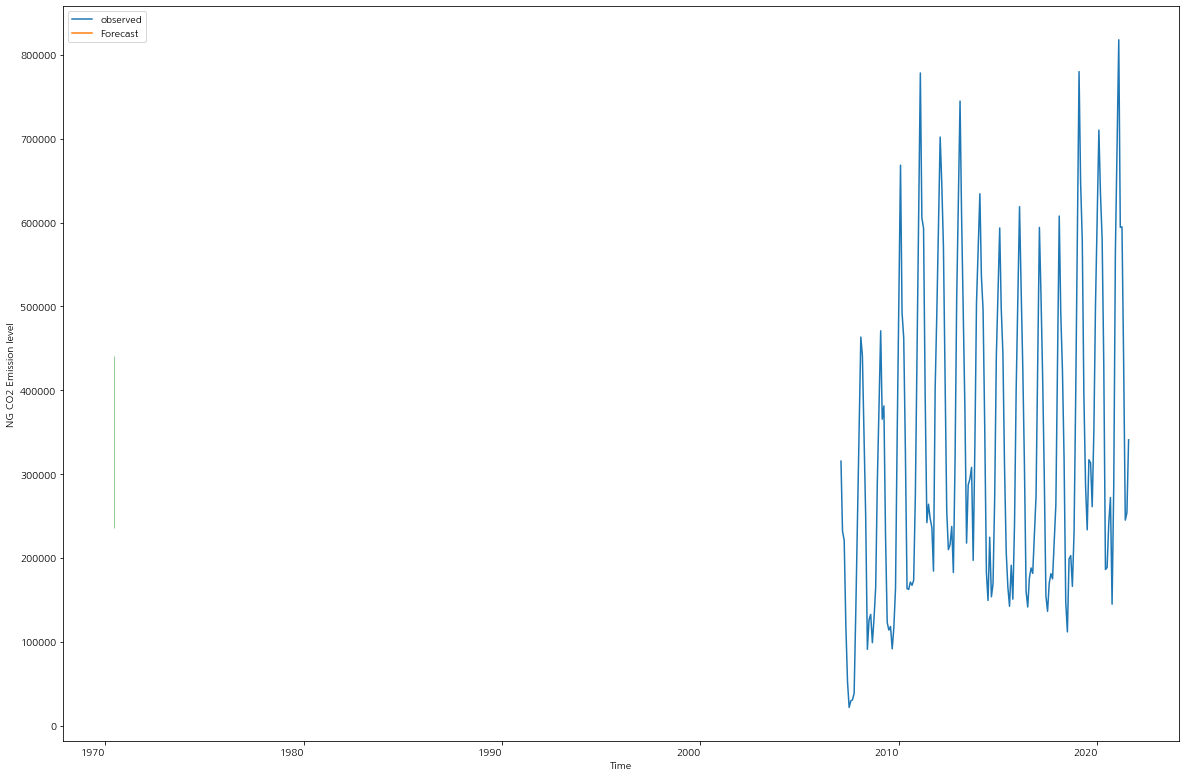

In [421]:
ax = dff_data['sum'][0:].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)

# ax.fill_betweenx(ax.get_ylim(), 
#                  pd.to_datetime('2019-05-31'), 
#                  dff_data['sum'].index[-1],
#                  alpha=.1, zorder=-1)

ax.set_xlabel('Time')
ax.set_ylabel('NG CO2 Emission level')
plt.legend()
plt.show()

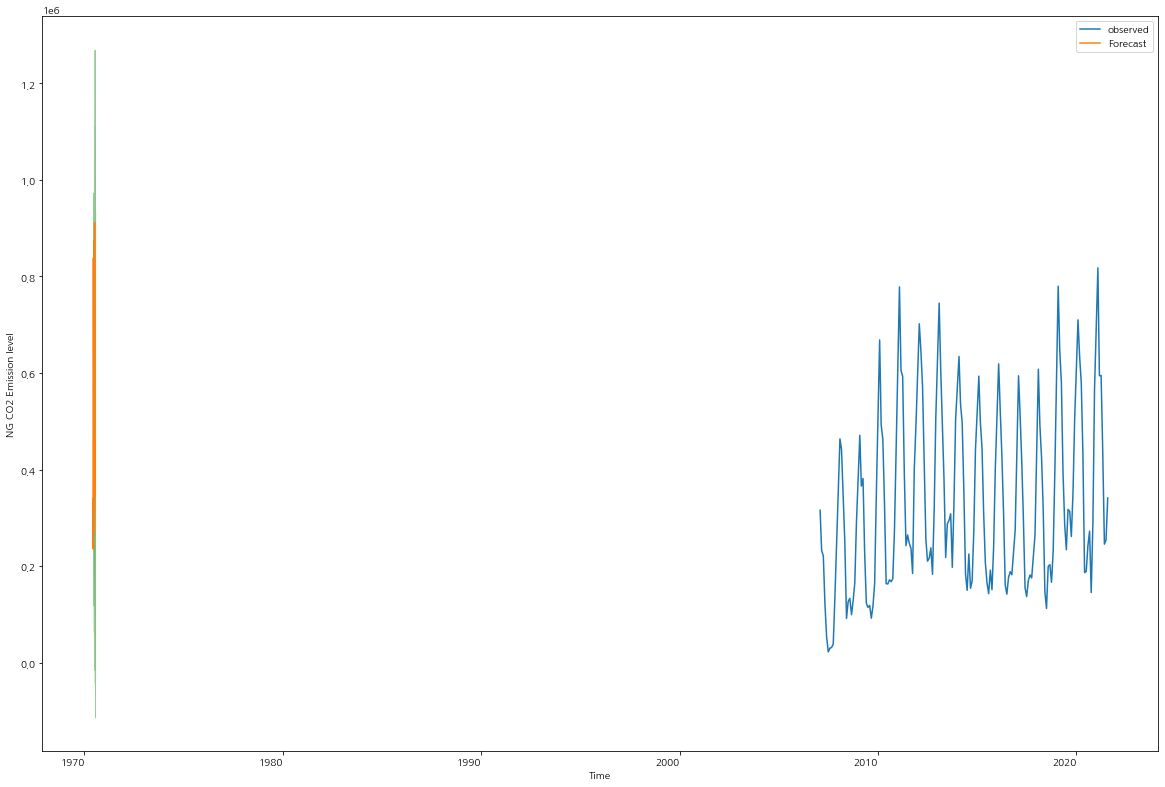

In [413]:
ax = dff_data['sum'].plot(label='observed', figsize=(20, 15))
forecast.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time')
ax.set_ylabel('NG CO2 Emission level')
plt.legend()
plt.show()

In [414]:
forecast_ci.index

RangeIndex(start=161, stop=197, step=1)

In [127]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
    plt.xlabel('Time in Years', fontsize = 18)
    plt.ylabel('Total Emissions', fontsize = 18)
    plt.legend(loc='best', fontsize = 18)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
    plt.show(block= True)

name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name
name


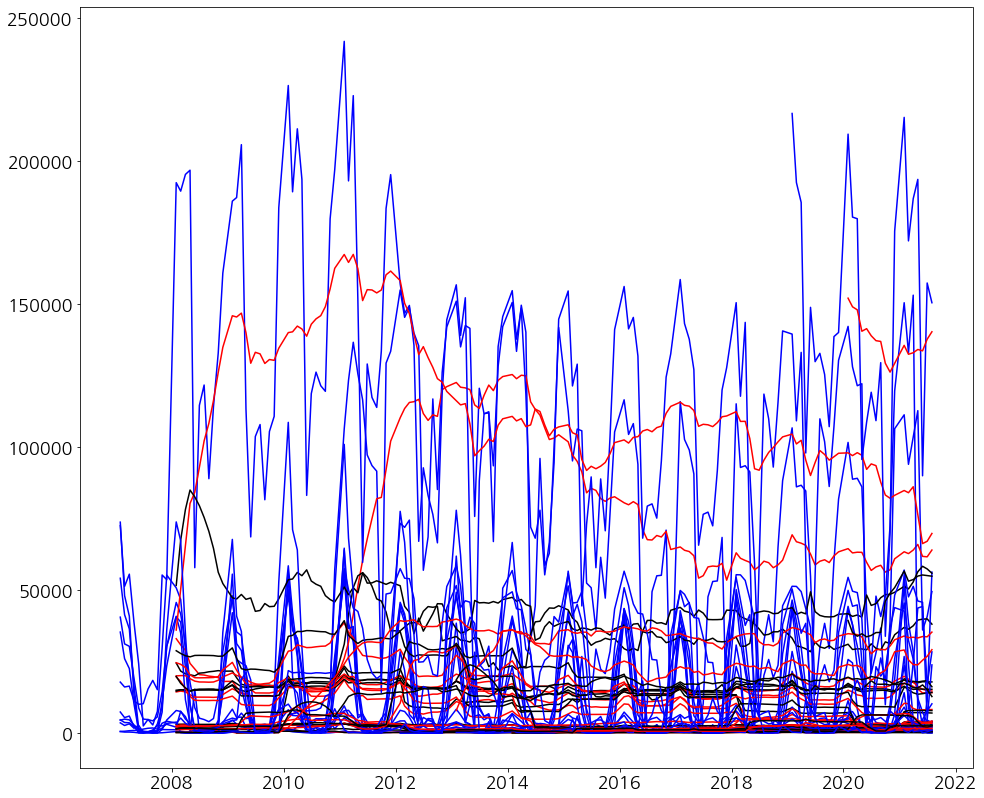

In [128]:
for name in names:
    print('name')
    rol_mean = dff_data[name].rolling(window = 12, center = False).mean()
    rol_std = dff_data[name].rolling(window = 12, center = False).std()
    
    plt.plot(dff_data[name], color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)

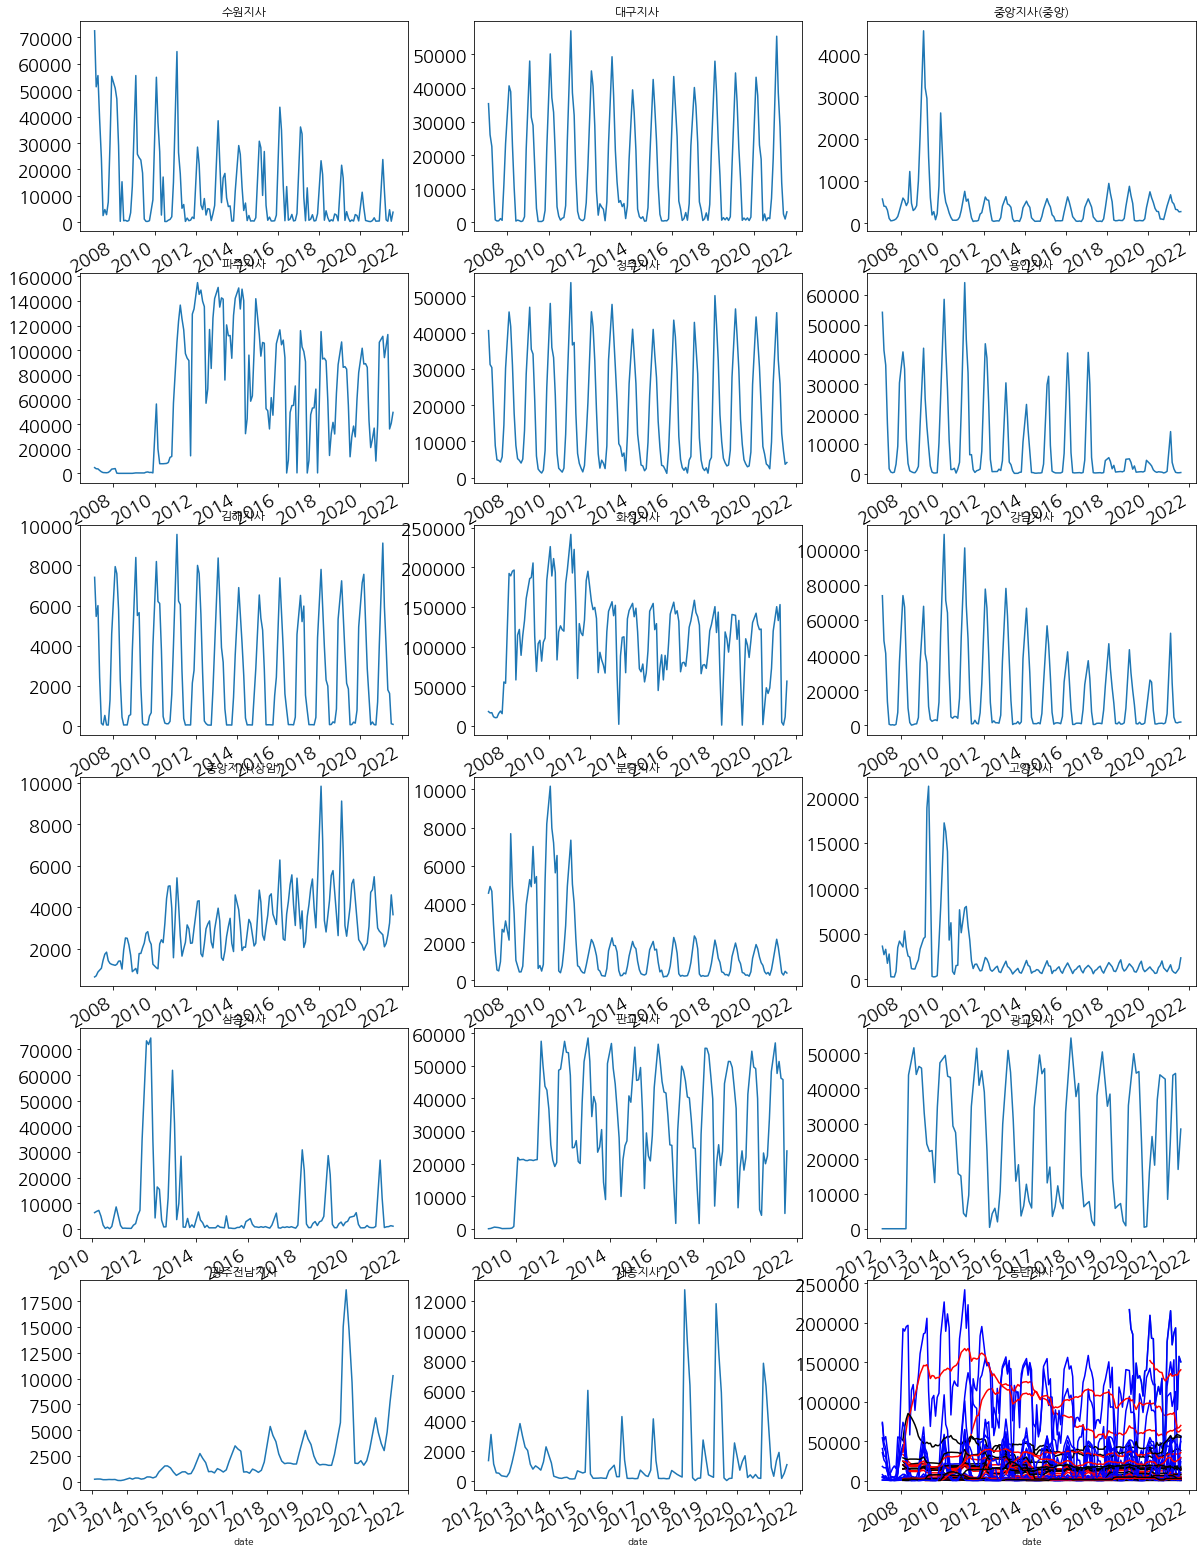

In [129]:
# fig, ax = plt.subplots(figsize=(16,8))
fig, axes = plt.subplots(6,3, constrained_layout=True, figsize = (20, 30))
for name, ax in zip(names, axes.flatten()):
    rol_mean = dff_data[name].rolling(window = 12, center = False).mean()
    rol_std = dff_data[name].rolling(window = 12, center = False).std()
    dff_data[name].plot(x = dff_data.index, y='Value', ax = ax, title=name, fontsize = 18)
    
    
    
    plt.plot(dff_data[name], color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)
    
#     plt.xlabel('Time in Years', fontsize = 18)
#     plt.ylabel('Total Emissions', fontsize = 18)
#     plt.legend(loc='best', fontsize = 18)
#     plt.title('Rolling Mean & Standard Deviation', fontsize = 18)
#     plt.show(block= True)
    
    
#     dff_data[name].plot(x = dff_data.index, y='Value', ax = ax, title=name, fontsize = 18)
#     ax.set_xlabel('Time(Monthly)')
#     ax.set_ylabel('Carbon Emissions')
#     ax.xaxis.label.set_size(18)
#     ax.yaxis.label.set_size(18)

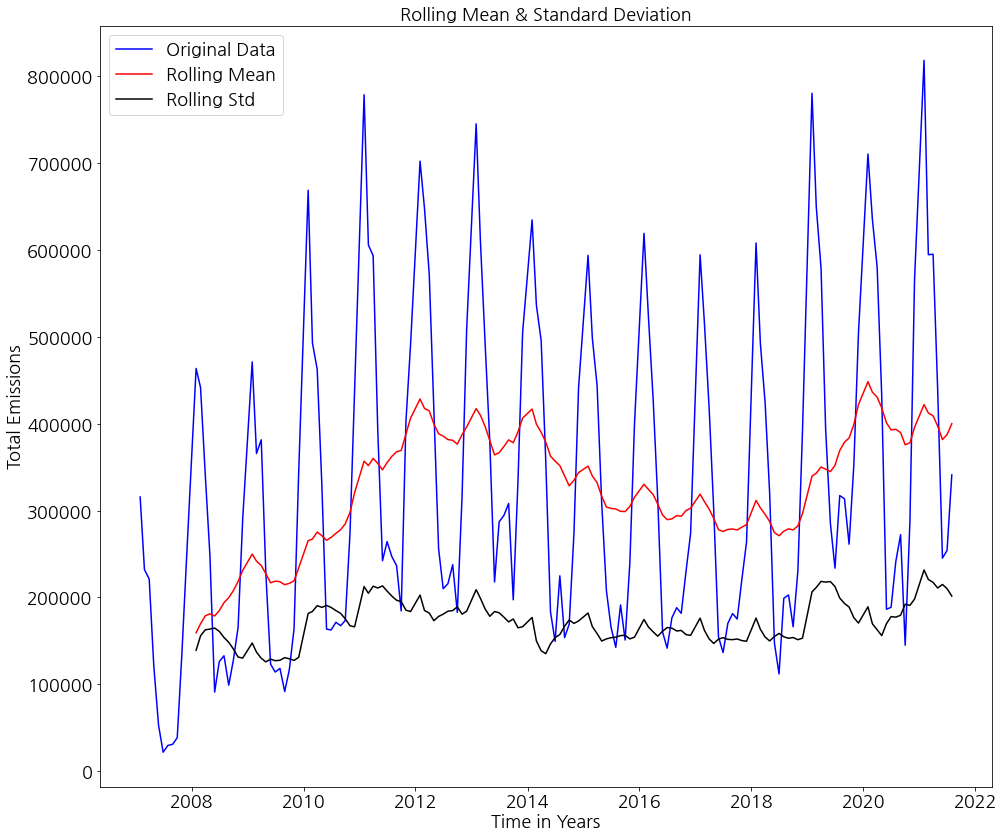

In [130]:
TestStationaryPlot(dff_data['sum'])

Text(0, 0.5, 'Carbon Emissions')

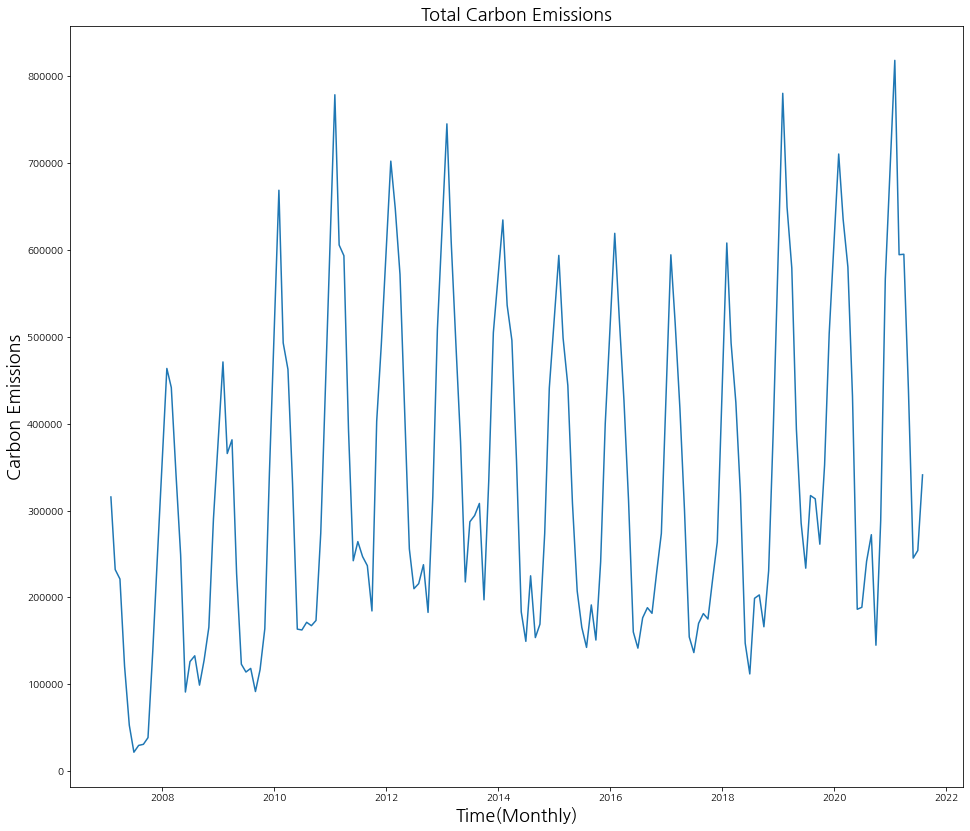

In [131]:
plt.title("Total Carbon Emissions", fontsize=18)
plt.plot(dff_data.index, dff_data['sum'].values)
plt.xlabel('Time(Monthly)', fontsize=18)
plt.ylabel('Carbon Emissions', fontsize=18)

In [132]:
moving_avg = mte.rolling(12).mean()
plt.plot(mte)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.xlabel('Time (years)', fontsize = 25)
plt.ylabel('CO2 Emission (MMT)', fontsize = 25)
plt.title('CO2 emission from electric power generation', fontsize = 25)
plt.show()

NameError: name 'mte' is not defined

In [ ]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    
    plt.xlabel('Time in Years', fontsize = 25)
    plt.ylabel('Total Emissions', fontsize = 25)
    plt.legend(loc='best', fontsize = 25)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 25)
    plt.show(block= True)

In [ ]:
dff_data['수원지사'].values

In [ ]:
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(x = dff.index, y=dff_data, label=desc,ax = ax, title='Carbon Emissions', fontsize = 20)
    ax.set_xlabel('Time(Monthly)')
    ax.set_ylabel('Carbon Emissions')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 16)

In [ ]:
dff.index

In [ ]:
len(calender)

In [ ]:
# 기간범위 : 200701 - 202107
df_date = pd.date_range('20070101', '20210802', freq='M')
df_date
len(df_date)
# df_date_list = df_date.strftime("%Y%m%d").tolist()
# len(df_date_list)
# 지사범위 200701(3~16), 202107(4~24)